In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/dataset/Multi-Modal_Glaucoma_Model.zip"
extract_path = "/content"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extraction complete! Files are now in: {extract_path}")


Extraction complete! Files are now in: /content


In [ ]:
import pandas as pd

# Path to your CSV file
csv_path = "/content/Shared/metadata - standardized.csv"

# Read the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows
df.head()
df.columns

Index(['names', 'types', 'type_expanded', 'isColor', 'original_name',
       'patient_id', 'fundus', 'fundus_od_seg', 'fundus_oc_seg', 'bv_seg',
       'artery_seg', 'vein_seg', 'oct', 'oct_oc_seg', 'oct_od_seg', 'sex',
       'gender', 'age', 'eye', 'sbp', 'dbp', 'hr', 'iop', 'vcdr',
       'Unnamed: 24', 'notchI_present', 'notchS_present', 'notchN_present',
       'notchT_present', 'expert1_grade', 'expert2_grade', 'expert3_grade',
       'expert4_grade', 'expert5_grade', 'cdr_avg', 'cdr_expert1',
       'cdr_expert2', 'cdr_expert3', 'cdr_expert4', 'refractive_dioptre_1',
       'refractive_dioptre_2', 'refractive_astigmatism',
       'phakic_or_pseudophakic', 'iop_perkins', 'iop_pneumatic', 'pachymetry',
       'axial_length', 'visual_field_mean_defect'],
      dtype='object')

In [ ]:
df["image_path"] = df["fundus"].apply(lambda x: x.replace("/full-fundus", "/content/Fundus_task/full-fundus/full-fundus") if isinstance(x, str) else None)
df["vessel_path"] = df["fundus_vessel_seg"].apply(
    lambda x: x.replace("/blood-vessel", "/content/Fundus_task/blood-vessel/blood-vessel") if isinstance(x, str) else None
)



In [ ]:
# Keep only the required columns
df3 = df[[
    "fundus",         # Input image
    "fundus_od_seg",  # Optic Disc Mask
    "fundus_oc_seg",
    "od_path",
    "oc_path",
    "image_path",# Optic Cup Mask
]]
# Keep only the required columns
df2 = df[[
 "od_path",
]]
# Keep only the required columns
df1 = df[[
    "fundus",                 # Blood Vessel Mask
    "artery_seg",     # Artery Mask
    "vein_seg"        # Vein Mask
]]


In [ ]:
df2.dropna()

od_path
4546   /content/Fundus_task/optic-disc/optic-disc/ORI...
4547   /content/Fundus_task/optic-disc/optic-disc/ORI...
4548   /content/Fundus_task/optic-disc/optic-disc/ORI...
4549   /content/Fundus_task/optic-disc/optic-disc/ORI...
4550   /content/Fundus_task/optic-disc/optic-disc/ORI...
...                                                  ...
12044  /content/Fundus_task/optic-disc/optic-disc/PAP...
12045  /content/Fundus_task/optic-disc/optic-disc/PAP...
12046  /content/Fundus_task/optic-disc/optic-disc/PAP...
12047  /content/Fundus_task/optic-disc/optic-disc/PAP...
12048  /content/Fundus_task/optic-disc/optic-disc/PAP...

[3103 rows x 1 columns]

In [ ]:
import os

# Safely create new columns using .loc to avoid warnings
df3.loc[:, "od_file"] = df3["od_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) and "Not Visible" not in x else None)
df3.loc[:, "oc_file"] = df3["oc_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) and "Not Visible" not in x else None)

# Compare the filenames
df3.loc[:, "od_oc_same_filename"] = df3["od_file"] == df3["oc_file"]

# Count mismatches
mismatches = df3[~df3["od_oc_same_filename"]]
print(f"Number of mismatched OD and OC filenames: {len(mismatches)}")

# Show sample mismatches
print("\nSample mismatches:")
print(mismatches[["od_file", "oc_file"]].head())


Number of mismatched OD and OC filenames: 9576

Sample mismatches:
  od_file oc_file
0    None    None
1    None    None
2    None    None
3    None    None
4    None    None


<ipython-input-8-e2de666c503c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, "od_file"] = df3["od_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) and "Not Visible" not in x else None)
<ipython-input-8-e2de666c503c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, "oc_file"] = df3["oc_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) and "Not Visible" not in x else None)
<ipython-input-8-e2de666c503c>:8: SettingWithCopyWarning: 
A value is trying to be

In [ ]:
df3.loc[:, "image_file"] = df3["image_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) else None)
df3.loc[:, "od_file"] = df3["od_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) and "Not Visible" not in x else None)
df3.loc[:, "oc_file"] = df3["oc_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) and "Not Visible" not in x else None)

df3.loc[:, "image_od_same"] = df3["image_file"] == df3["od_file"]
df3.loc[:, "image_oc_same"] = df3["image_file"] == df3["oc_file"]


<ipython-input-9-399b29f87582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, "image_file"] = df3["image_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) else None)
<ipython-input-9-399b29f87582>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, "image_od_same"] = df3["image_file"] == df3["od_file"]
<ipython-input-9-399b29f87582>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [ ]:
# Extract filenames only from paths
df3["image_file"] = df3["image_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) else None)
df3["od_file"] = df3["od_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) else None)
df3["oc_file"] = df3["oc_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) else None)

# Compare if all filenames match
df3["same_filename"] = (df3["image_file"] == df3["od_file"]) & (df3["image_file"] == df3["oc_file"])

# Count mismatches
num_mismatches = (~df3["same_filename"]).sum()

print(f"Number of mismatched filenames: {num_mismatches}")
print("\nSample mismatches:")
print(df3[~df3["same_filename"]][["image_file", "od_file", "oc_file"]].head())


Number of mismatched filenames: 9576

Sample mismatches:
                    image_file od_file oc_file
0  OIA-ODIR-TEST-OFFLINE-1.png    None    None
1  OIA-ODIR-TEST-OFFLINE-2.png    None    None
2  OIA-ODIR-TEST-OFFLINE-4.png    None    None
3  OIA-ODIR-TEST-OFFLINE-5.png    None    None
4  OIA-ODIR-TEST-OFFLINE-6.png    None    None


<ipython-input-10-106d28a5aace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["image_file"] = df3["image_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) else None)
<ipython-input-10-106d28a5aace>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["od_file"] = df3["od_path"].apply(lambda x: os.path.basename(x) if isinstance(x, str) else None)
<ipython-input-10-106d28a5aace>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [ ]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()


In [ ]:
df3.tail(200)

fundus               fundus_od_seg  \
11849  /full-fundus/PAPILA-289.png  /optic-disc/PAPILA-289.png   
11850  /full-fundus/PAPILA-290.png  /optic-disc/PAPILA-290.png   
11851  /full-fundus/PAPILA-291.png  /optic-disc/PAPILA-291.png   
11852  /full-fundus/PAPILA-292.png  /optic-disc/PAPILA-292.png   
11853  /full-fundus/PAPILA-293.png  /optic-disc/PAPILA-293.png   
...                            ...                         ...   
12044  /full-fundus/PAPILA-484.png  /optic-disc/PAPILA-484.png   
12045  /full-fundus/PAPILA-485.png  /optic-disc/PAPILA-485.png   
12046  /full-fundus/PAPILA-486.png  /optic-disc/PAPILA-486.png   
12047  /full-fundus/PAPILA-487.png  /optic-disc/PAPILA-487.png   
12048  /full-fundus/PAPILA-488.png  /optic-disc/PAPILA-488.png   

                   fundus_oc_seg  \
11849  /optic-cup/PAPILA-289.png   
11850  /optic-cup/PAPILA-290.png   
11851  /optic-cup/PAPILA-291.png   
11852  /optic-cup/PAPILA-292.png   
11853  /optic-cup/PAPILA-293.png   
...                          ...   
12044  /optic-cup/PAPILA-484.png   
12045  /optic-cup/PAPILA-485.png   
12046  /optic-cup/PAPILA-486.png   
12047  /optic-cup/PAPILA-487.png   
12048  /optic-cup/PAPILA-488.png   

                                                 od_path  \
11849  /content/Fundus_task/optic-disc/optic-disc/PAP...   
11850  /content/Fundus_task/optic-disc/optic-disc/PAP...   
11851  /content/Fundus_task/optic-disc/optic-disc/PAP...   
11852  /content/Fundus_task/optic-disc/optic-disc/PAP...   
11853  /content/Fundus_task/optic-disc/optic-disc/PAP...   
...                                                  ...   
12044  /content/Fundus_task/optic-disc/optic-disc/PAP...   
12045  /content/Fundus_task/optic-disc/optic-disc/PAP...   
12046  /content/Fundus_task/optic-disc/optic-disc/PAP...   
12047  /content/Fundus_task/optic-disc/optic-disc/PAP...   
12048  /content/Fundus_task/optic-disc/optic-disc/PAP...   

                                                 oc_path  \
11849  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
11850  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
11851  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
11852  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
11853  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
...                                                  ...   
12044  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
12045  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
12046  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
12047  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   
12048  /content/Fundus_task/optic-cup/optic-cup/PAPIL...   

                                              image_path         od_file  \
11849  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-289.png   
11850  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-290.png   
11851  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-291.png   
11852  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-292.png   
11853  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-293.png   
...                                                  ...             ...   
12044  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-484.png   
12045  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-485.png   
12046  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-486.png   
12047  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-487.png   
12048  /content/Fundus_task/full-fundus/full-fundus/P...  PAPILA-488.png   

              oc_file  od_oc_same_filename      image_file  image_od_same  \
11849  PAPILA-289.png                 True  PAPILA-289.png           True   
11850  PAPILA-290.png                 True  PAPILA-290.png           True   
11851  PAPILA-291.png                 True  PAPILA-291.png           True   
11852  PAPILA-292.png                 True  PAPILA-292.png           True   
11853  PAPILA-293.png                 True  PAPILA-293.png    

In [ ]:
# Define the columns you want to keep
required_columns = [
    "image_path", "od_path", "oc_path",  # full paths
    "image_file", "od_file", "oc_file",  # filenames
]

# Create a new DataFrame with only those columns
df_cleaned = df3[required_columns].copy()

# Preview the cleaned DataFrame
print(df_cleaned.shape)
df_cleaned.head()


(3102, 6)


image_path  \
4546  /content/Fundus_task/full-fundus/full-fundus/O...   
4547  /content/Fundus_task/full-fundus/full-fundus/O...   
4548  /content/Fundus_task/full-fundus/full-fundus/O...   
4549  /content/Fundus_task/full-fundus/full-fundus/O...   
4550  /content/Fundus_task/full-fundus/full-fundus/O...   

                                                od_path  \
4546  /content/Fundus_task/optic-disc/optic-disc/ORI...   
4547  /content/Fundus_task/optic-disc/optic-disc/ORI...   
4548  /content/Fundus_task/optic-disc/optic-disc/ORI...   
4549  /content/Fundus_task/optic-disc/optic-disc/ORI...   
4550  /content/Fundus_task/optic-disc/optic-disc/ORI...   

                                                oc_path   image_file  \
4546  /content/Fundus_task/optic-cup/optic-cup/ORIGA...  ORIGA-1.png   
4547  /content/Fundus_task/optic-cup/optic-cup/ORIGA...  ORIGA-2.png   
4548  /content/Fundus_task/optic-cup/optic-cup/ORIGA...  ORIGA-3.png   
4549  /content/Fundus_task/optic-cup/optic-cup/ORIGA...  ORIGA-4.png   
4550  /content/Fundus_task/optic-cup/optic-cup/ORIGA...  ORIGA-5.png   

          od_file      oc_file  
4546  ORIGA-1.png  ORIGA-1.png  
4547  ORIGA-2.png  ORIGA-2.png  
4548  ORIGA-3.png  ORIGA-3.png  
4549  ORIGA-4.png  ORIGA-4.png  
4550  ORIGA-5.png  ORIGA-5.png

<ipython-input-14-6269ffcbec9f>:106: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(weights='imagenet', include_top=False, input_tensor=inputs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 128,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 128, 128,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 128, 128,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 128, 128,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 128, 128,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 128, 128,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 129, 129,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 64, 64,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 64, 64,    │      2,304 │ block_1_depthwis

 Total params: 2,730,226 (10.41 MB)

 Trainable params: 886,194 (3.38 MB)

 Non-trainable params: 1,844,032 (7.03 MB)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


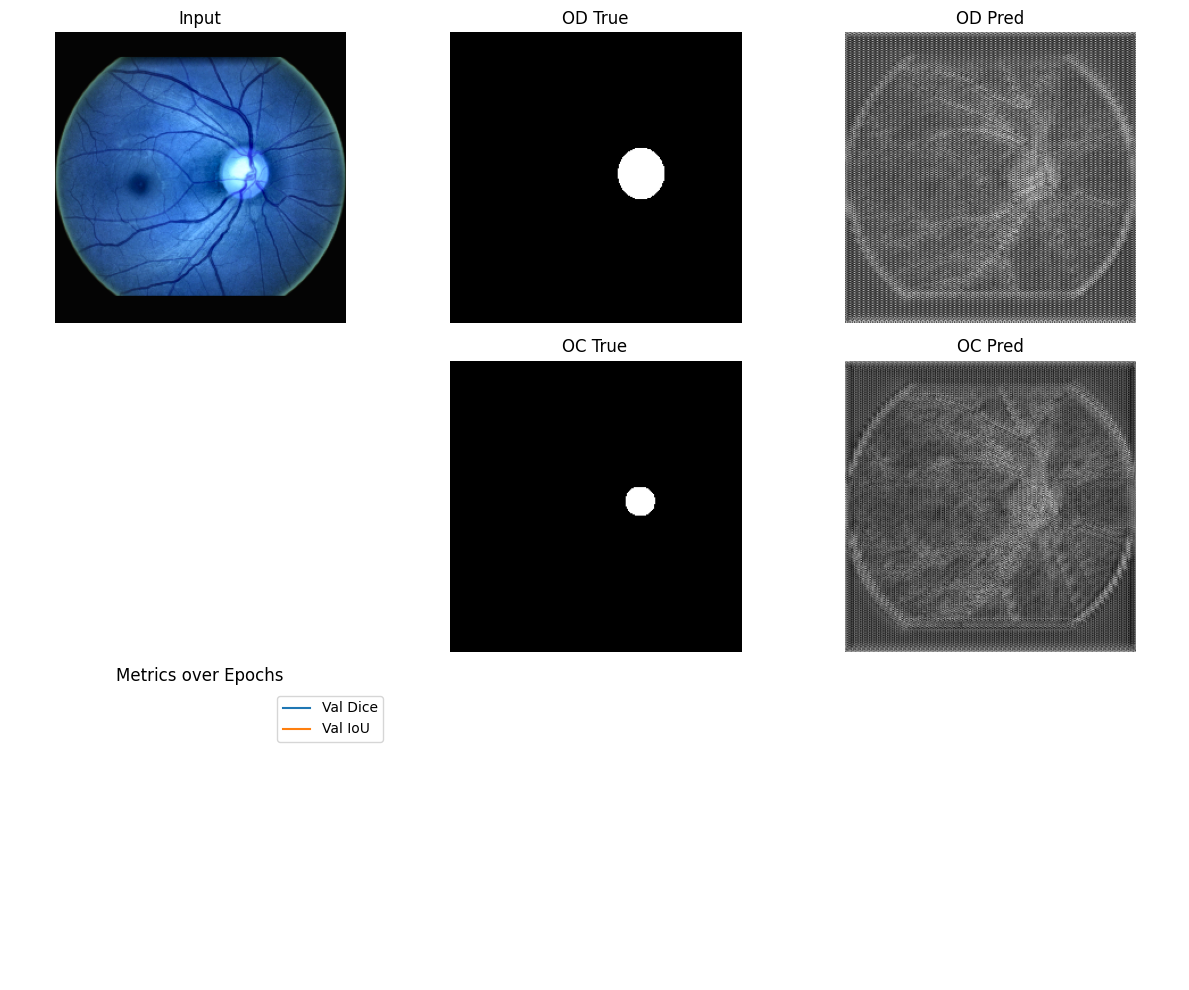

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


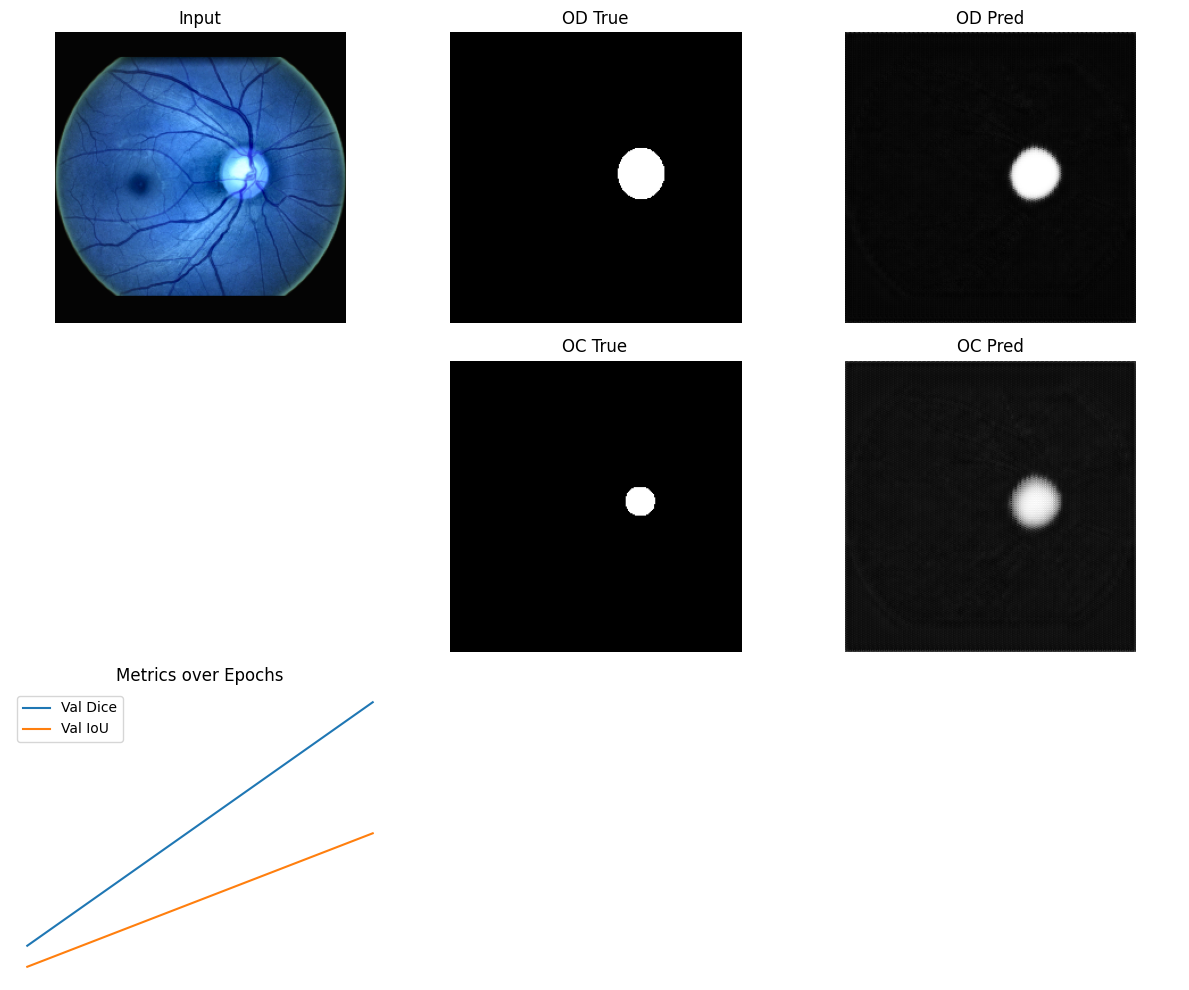

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


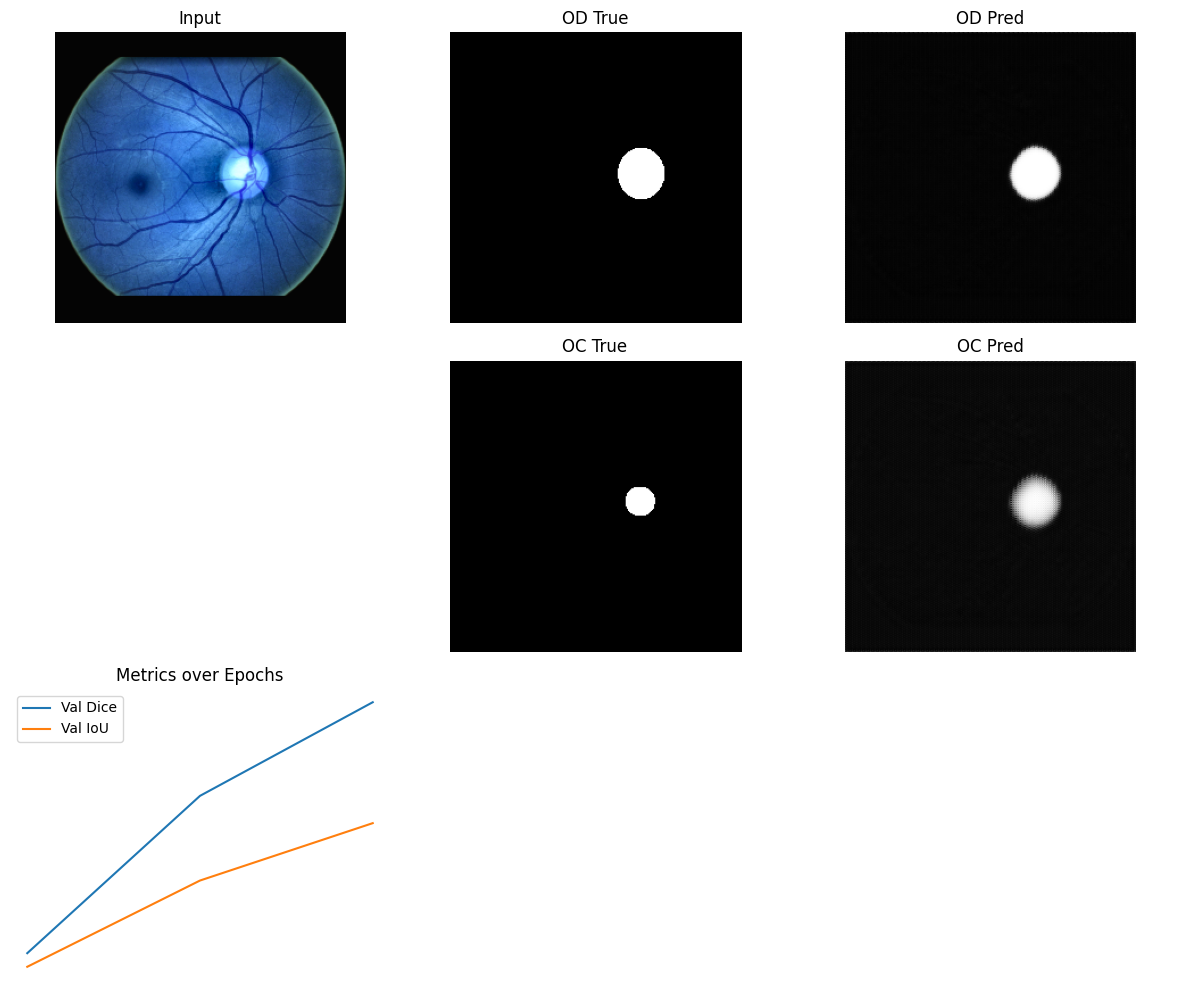

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


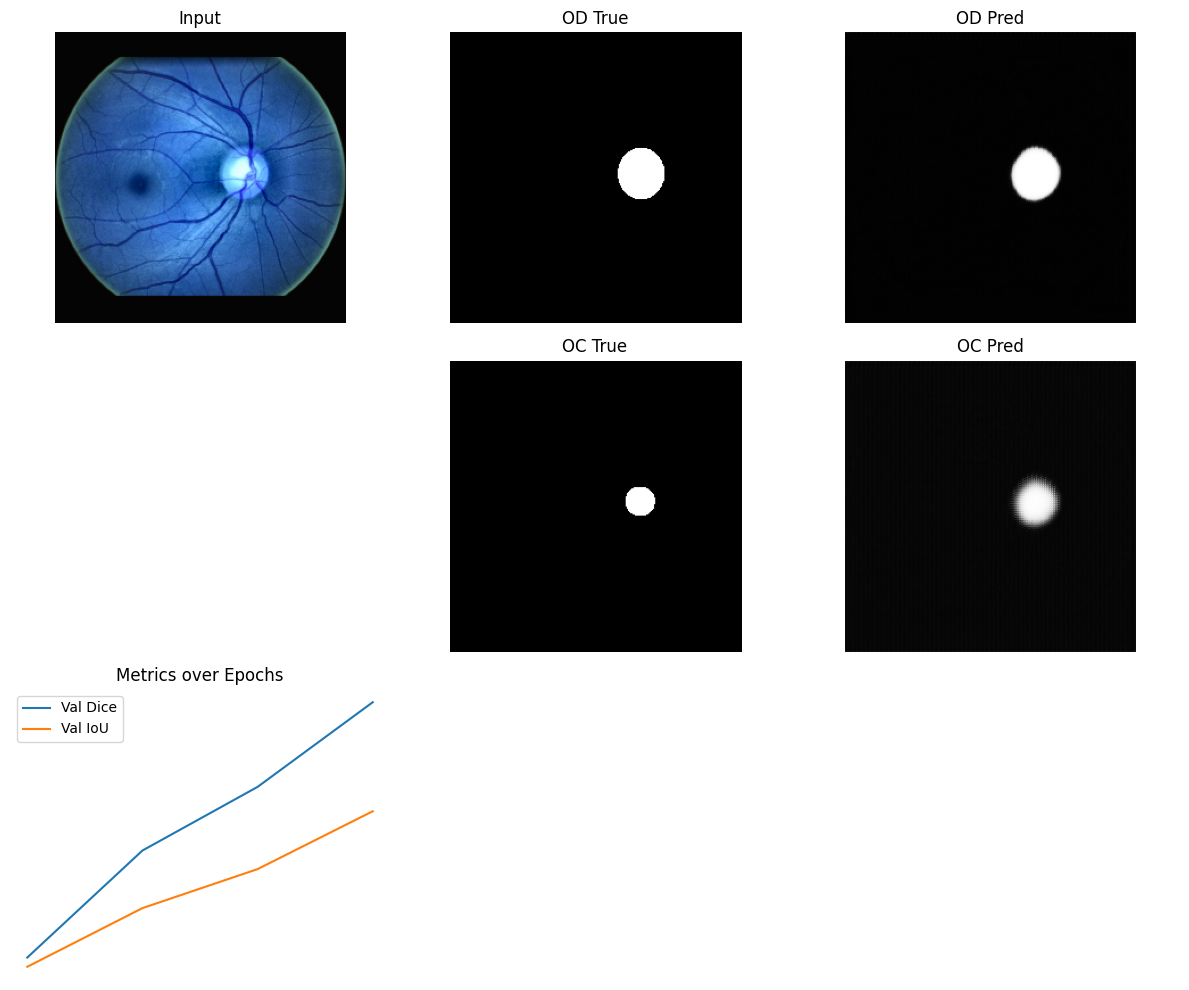

✅ Model saved to /content/drive/MyDrive/Model/model_epoch_5.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


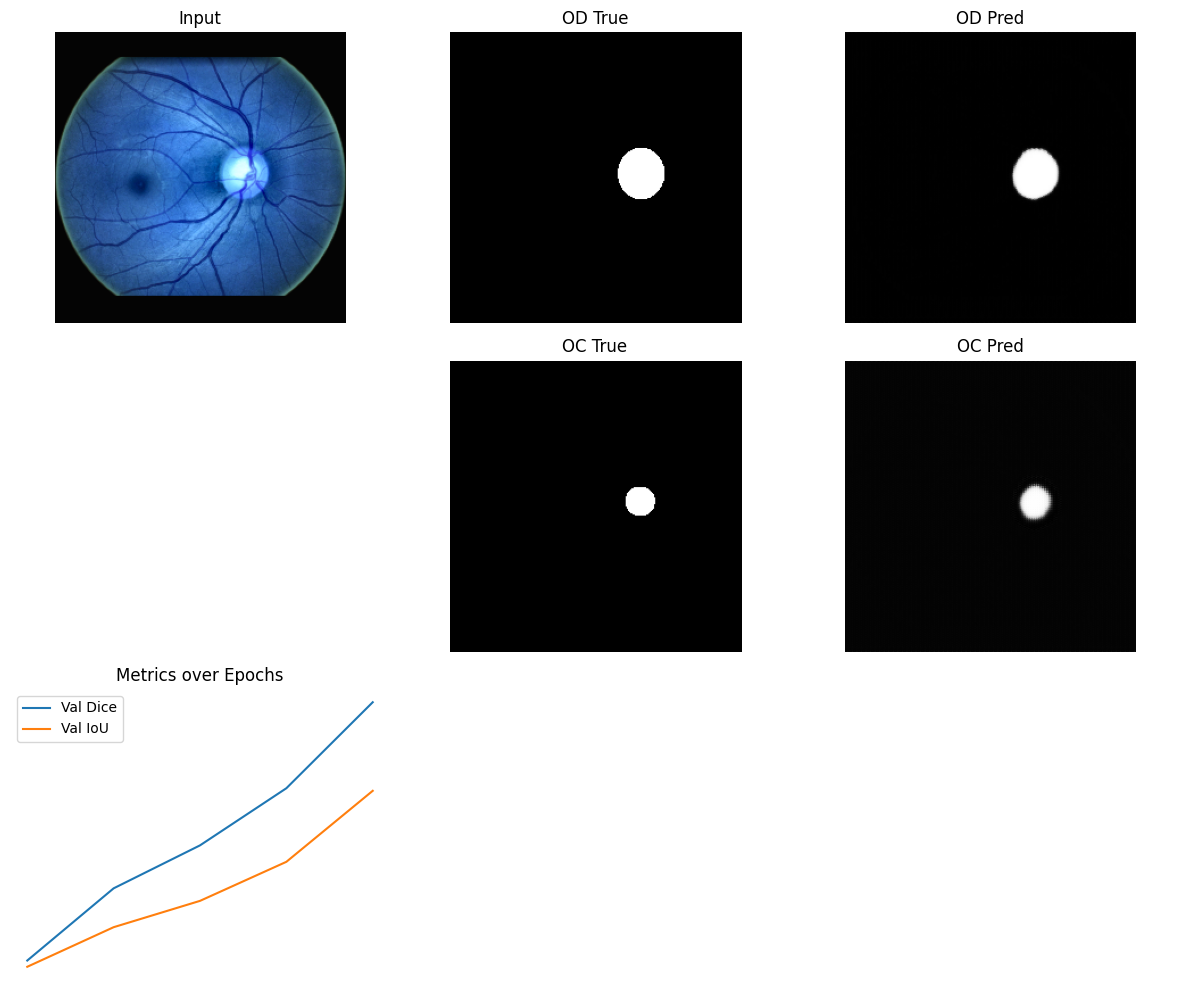

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


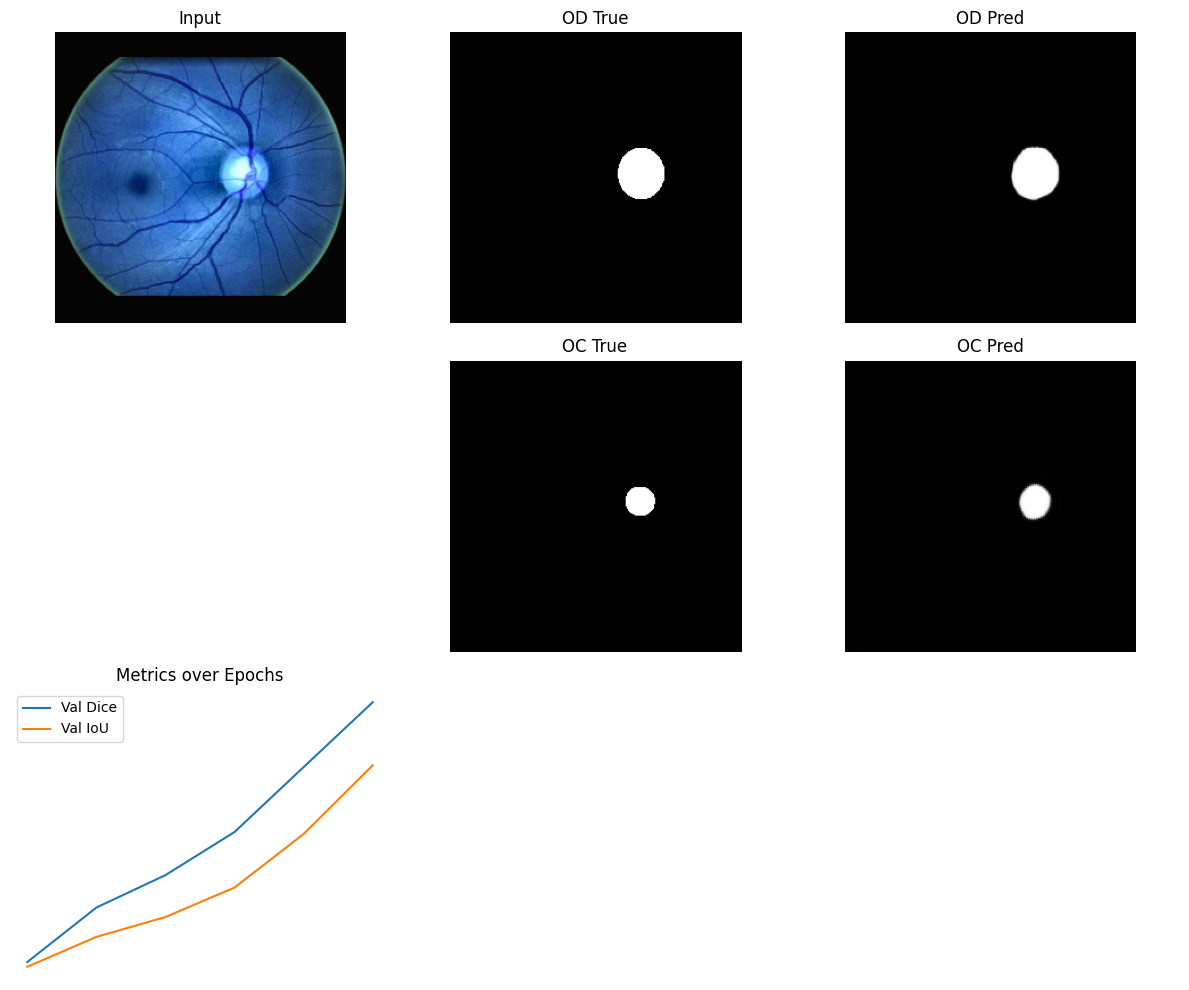

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


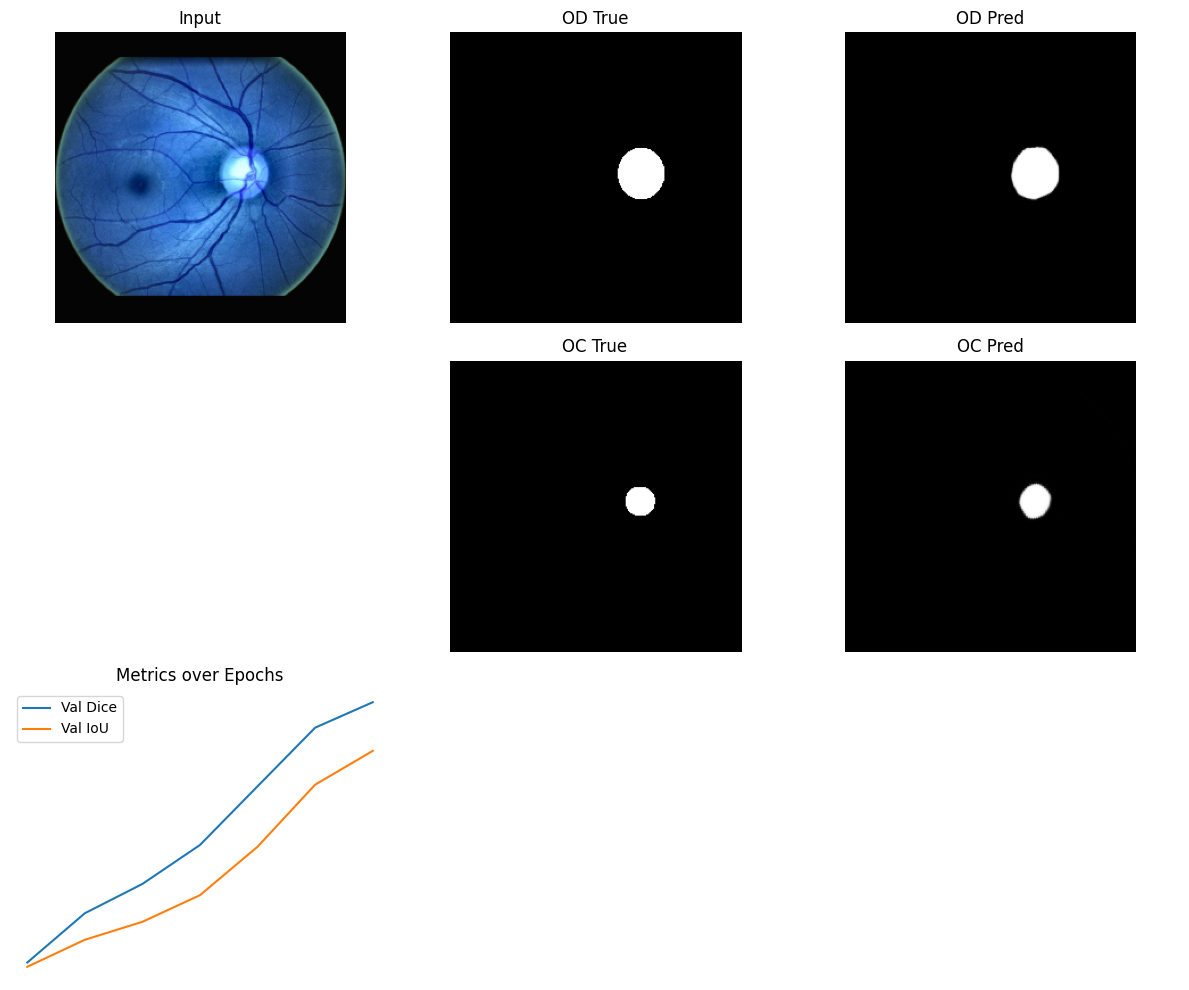

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


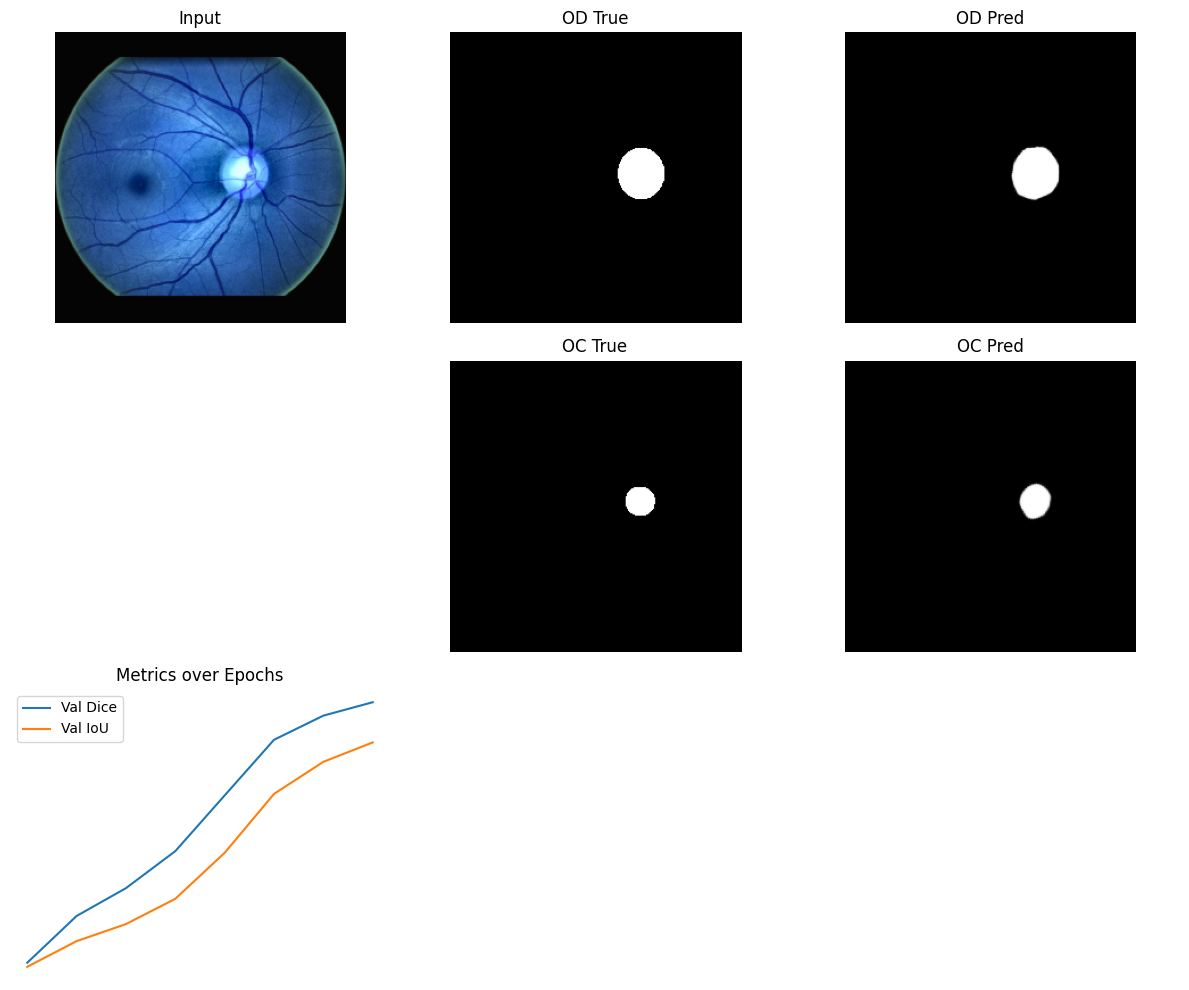

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


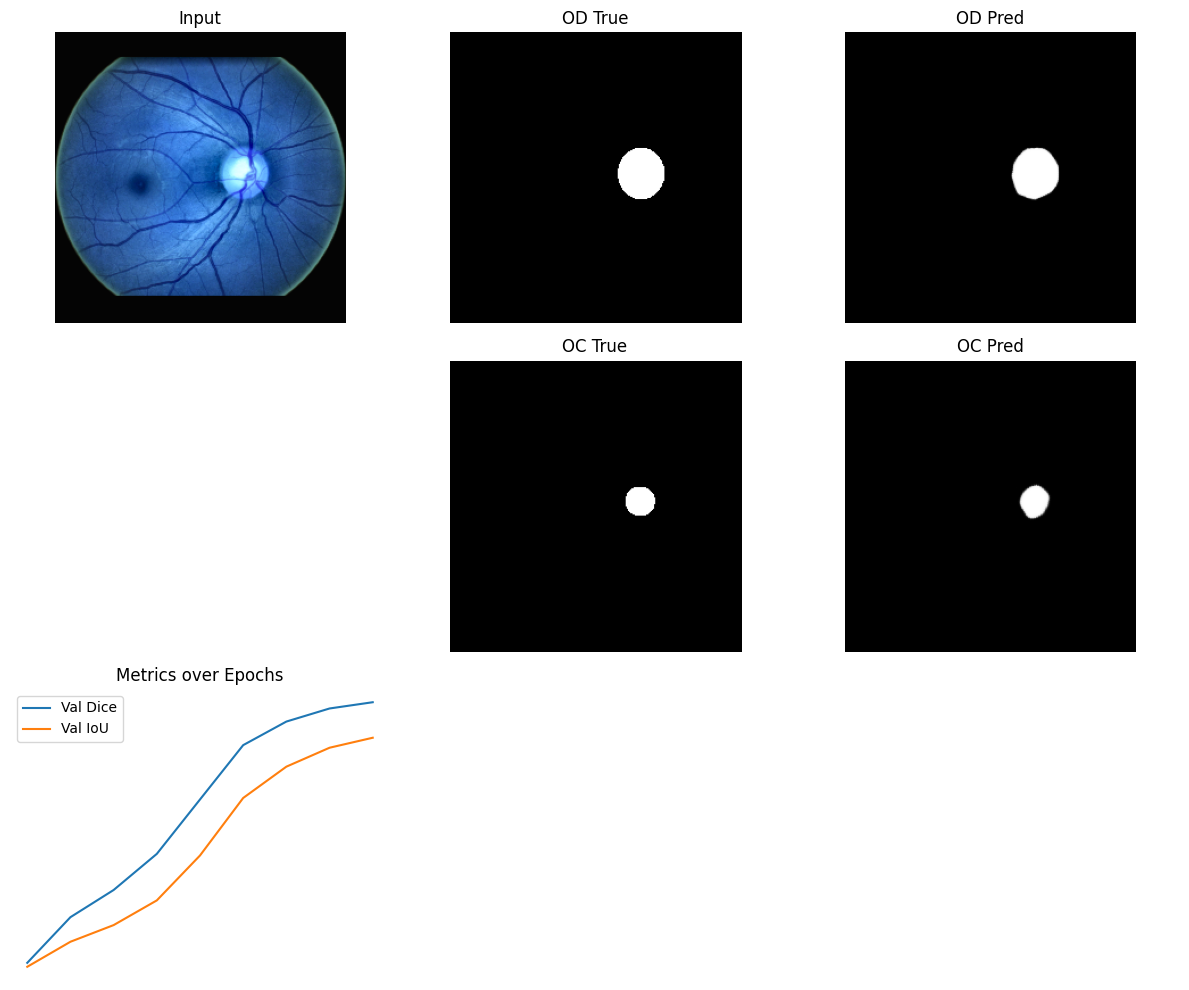

✅ Model saved to /content/drive/MyDrive/Model/model_epoch_10.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


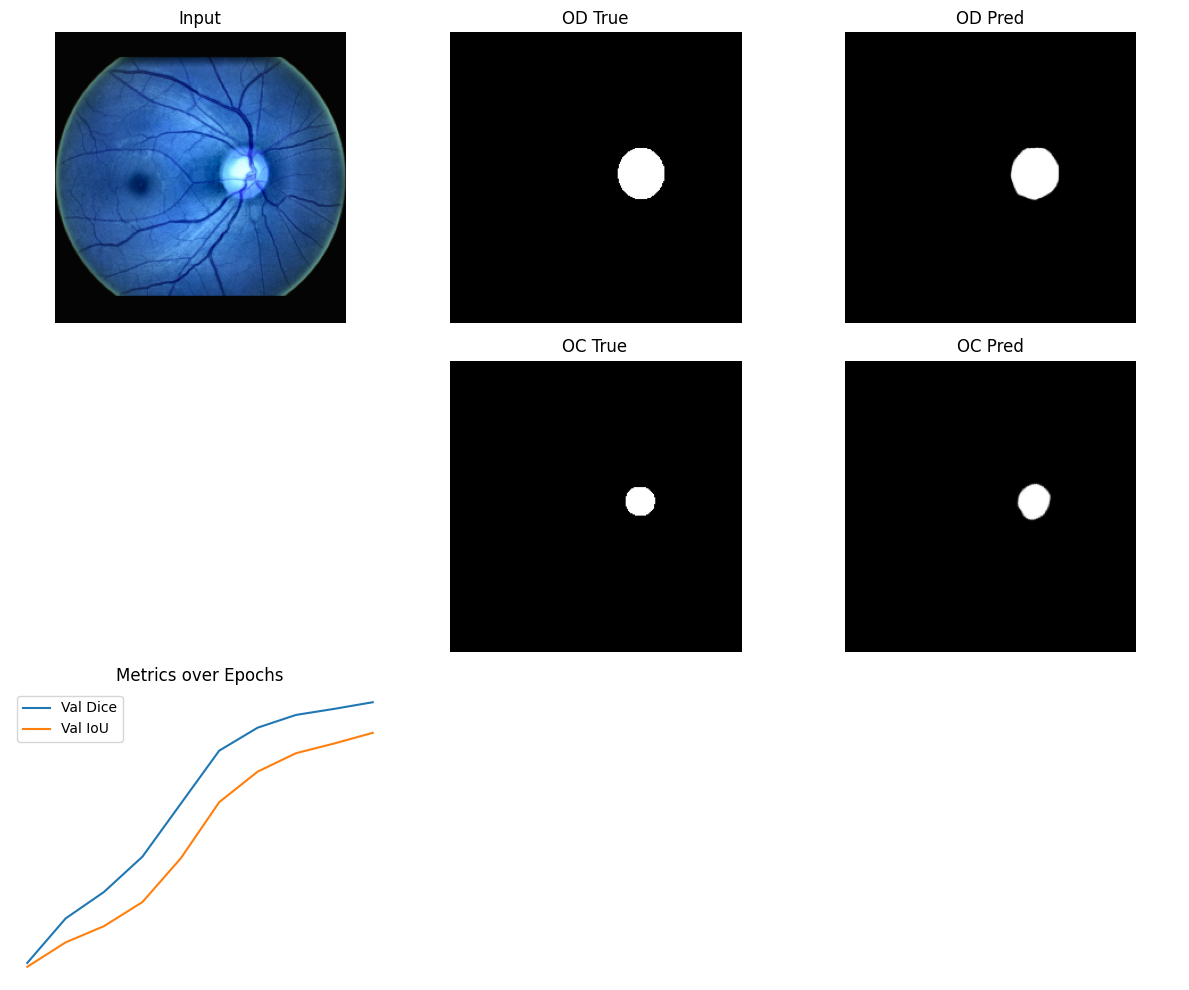

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


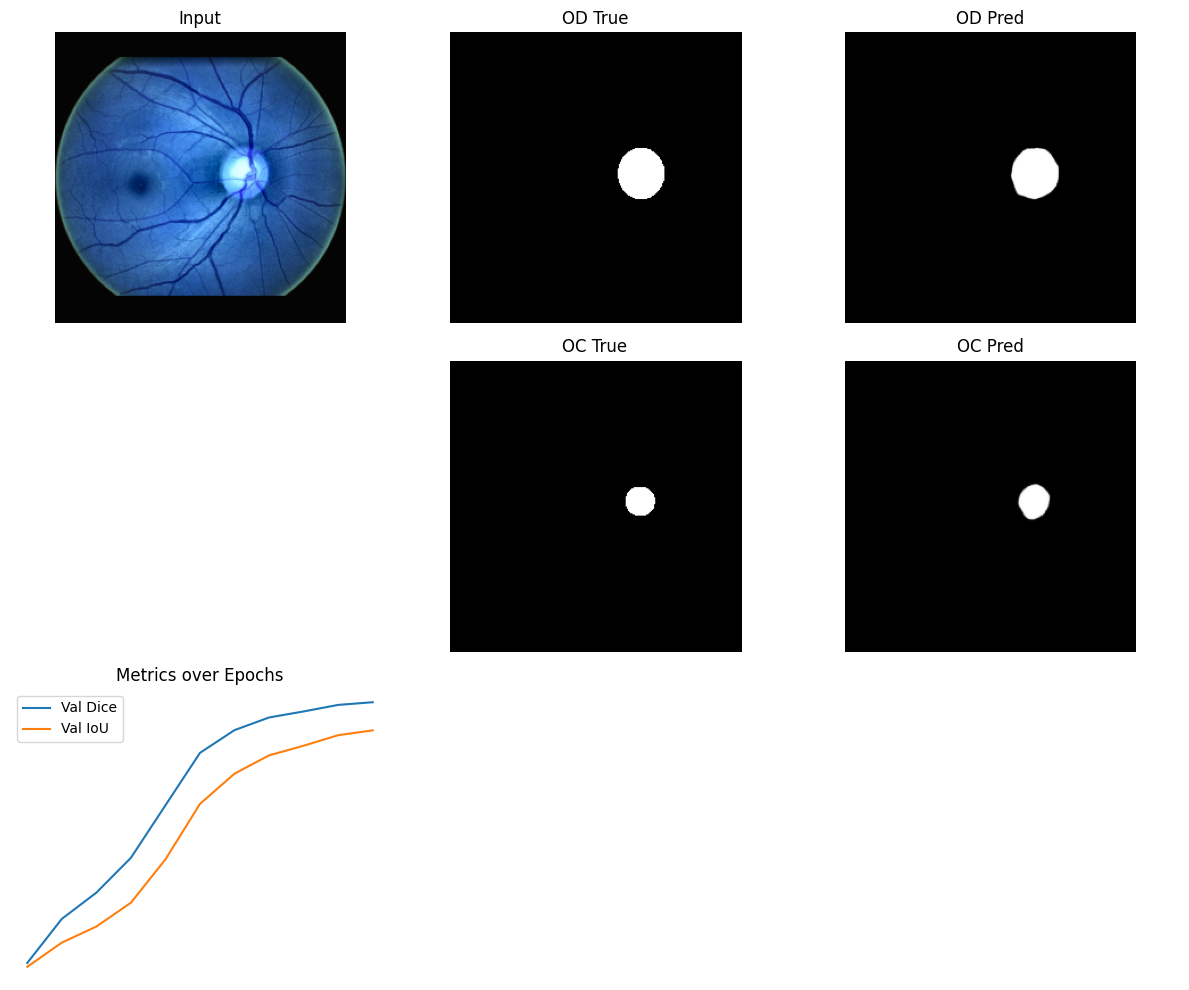

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


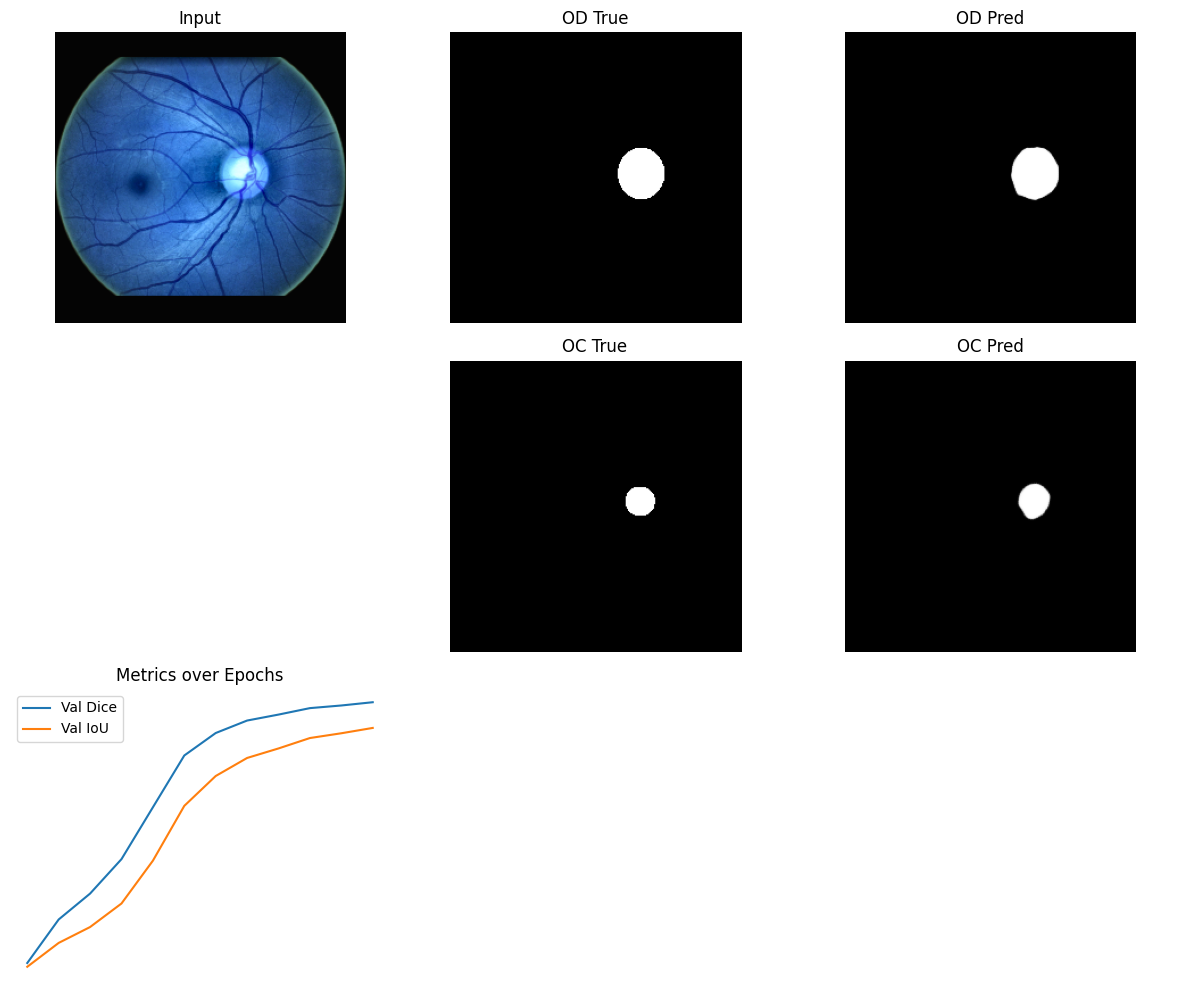

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


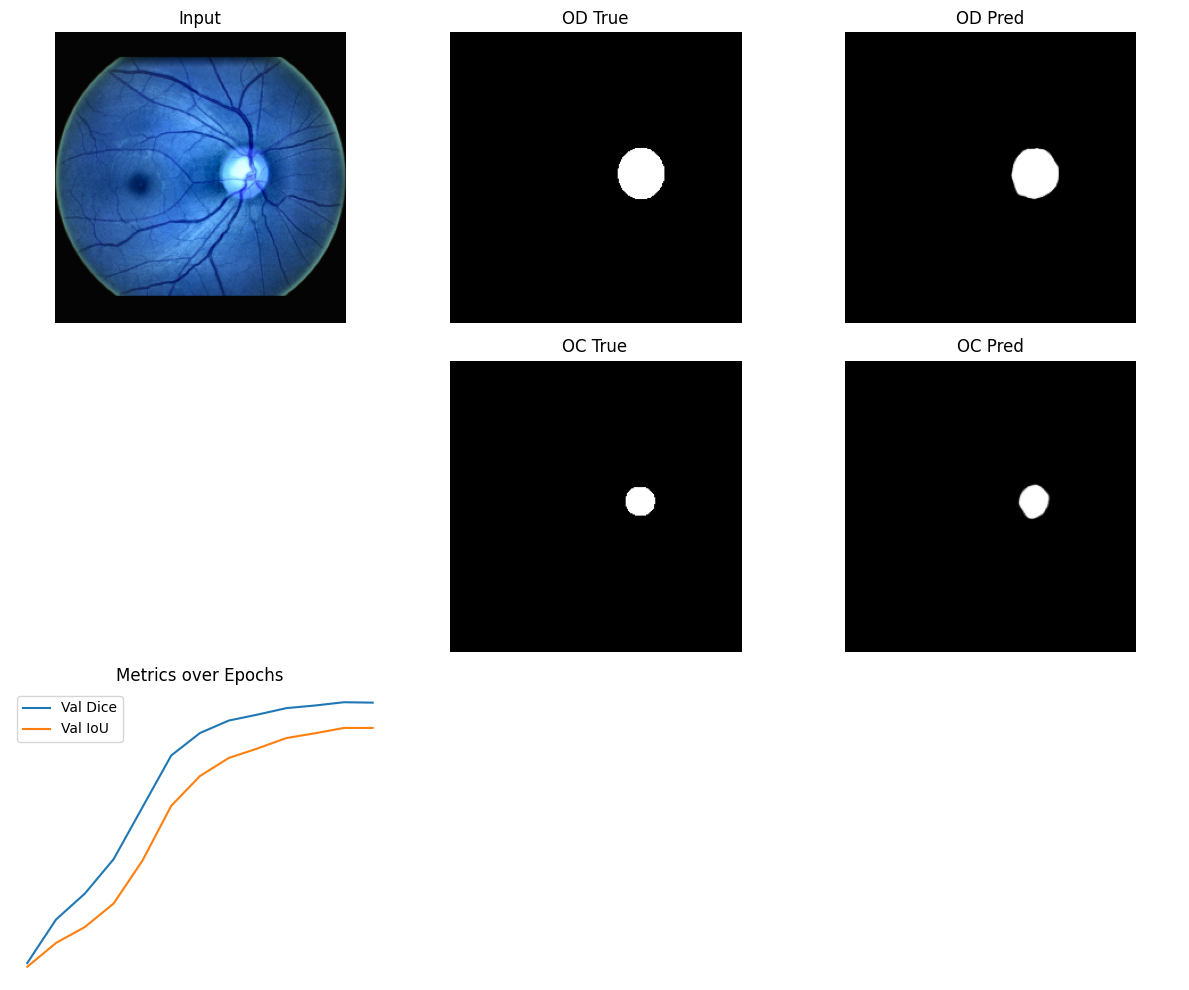

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


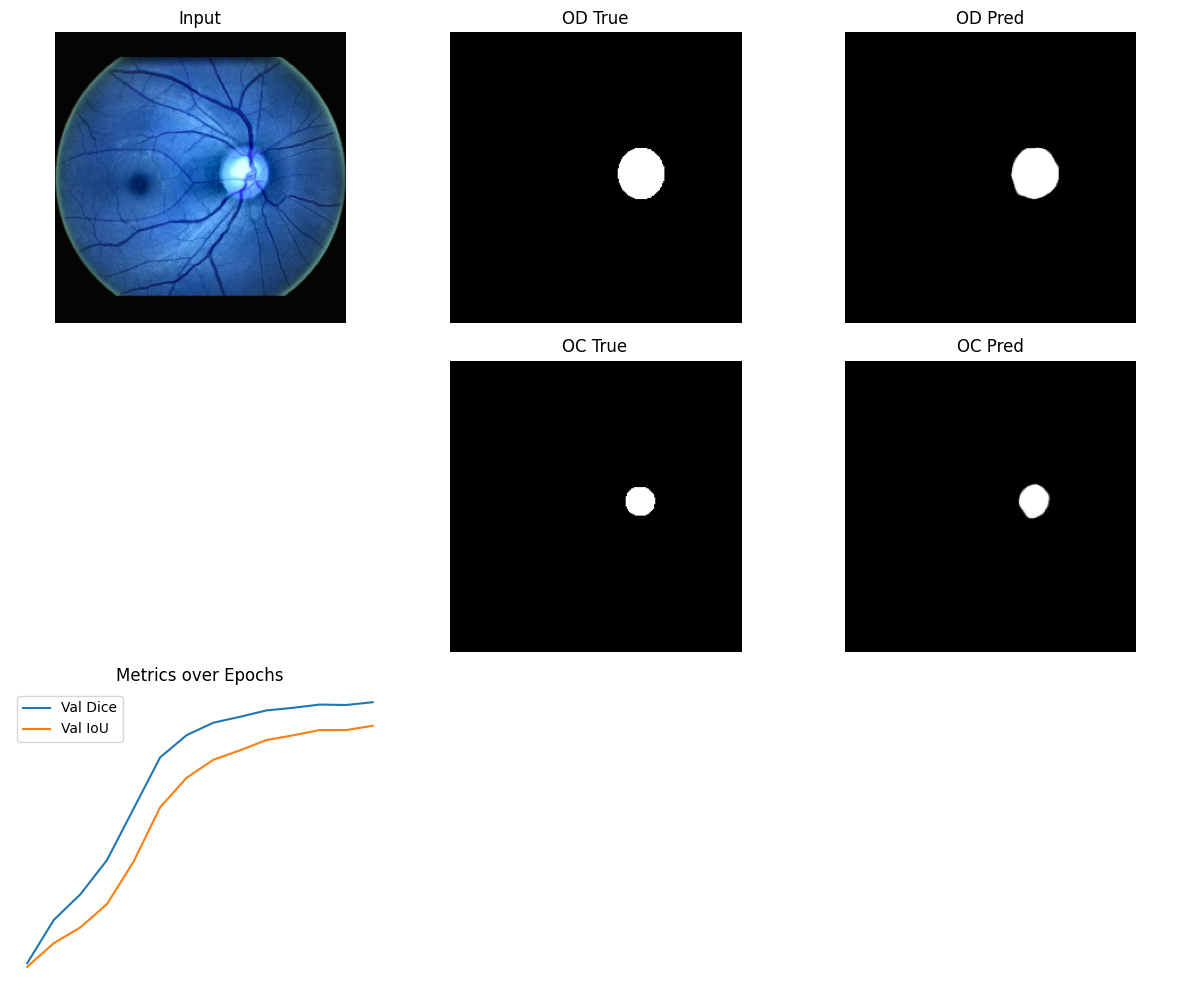

✅ Model saved to /content/drive/MyDrive/Model/model_epoch_15.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


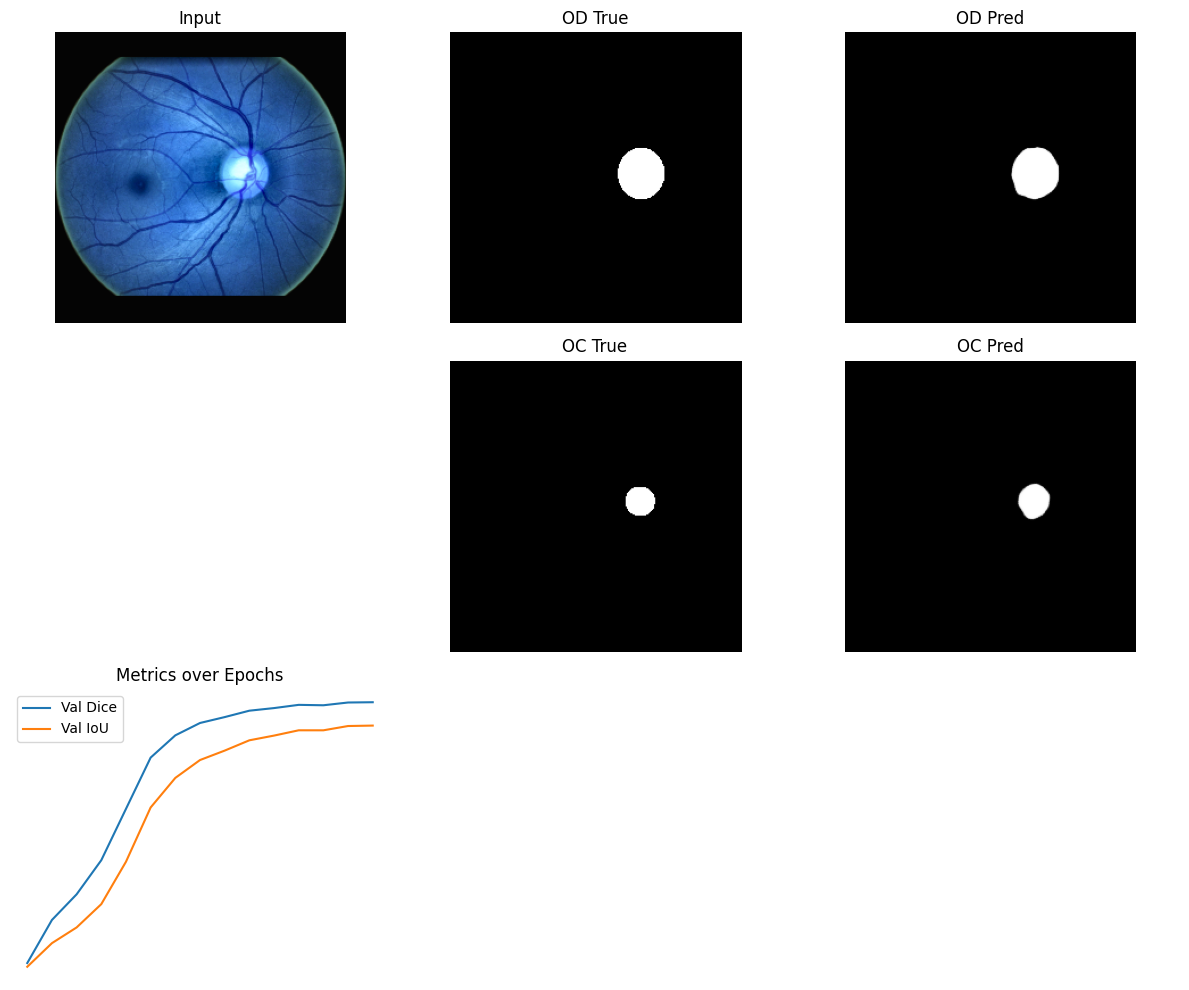

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


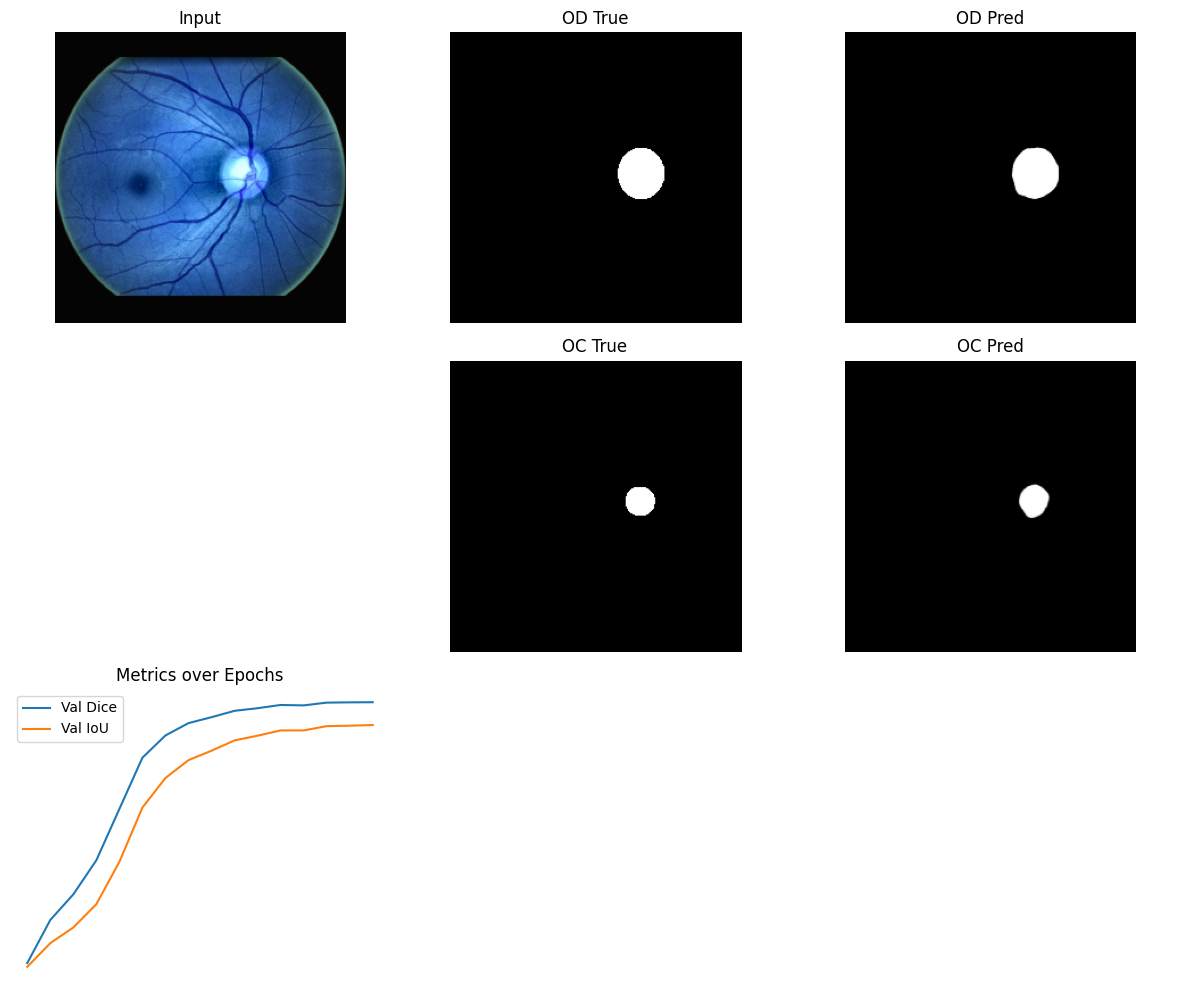

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


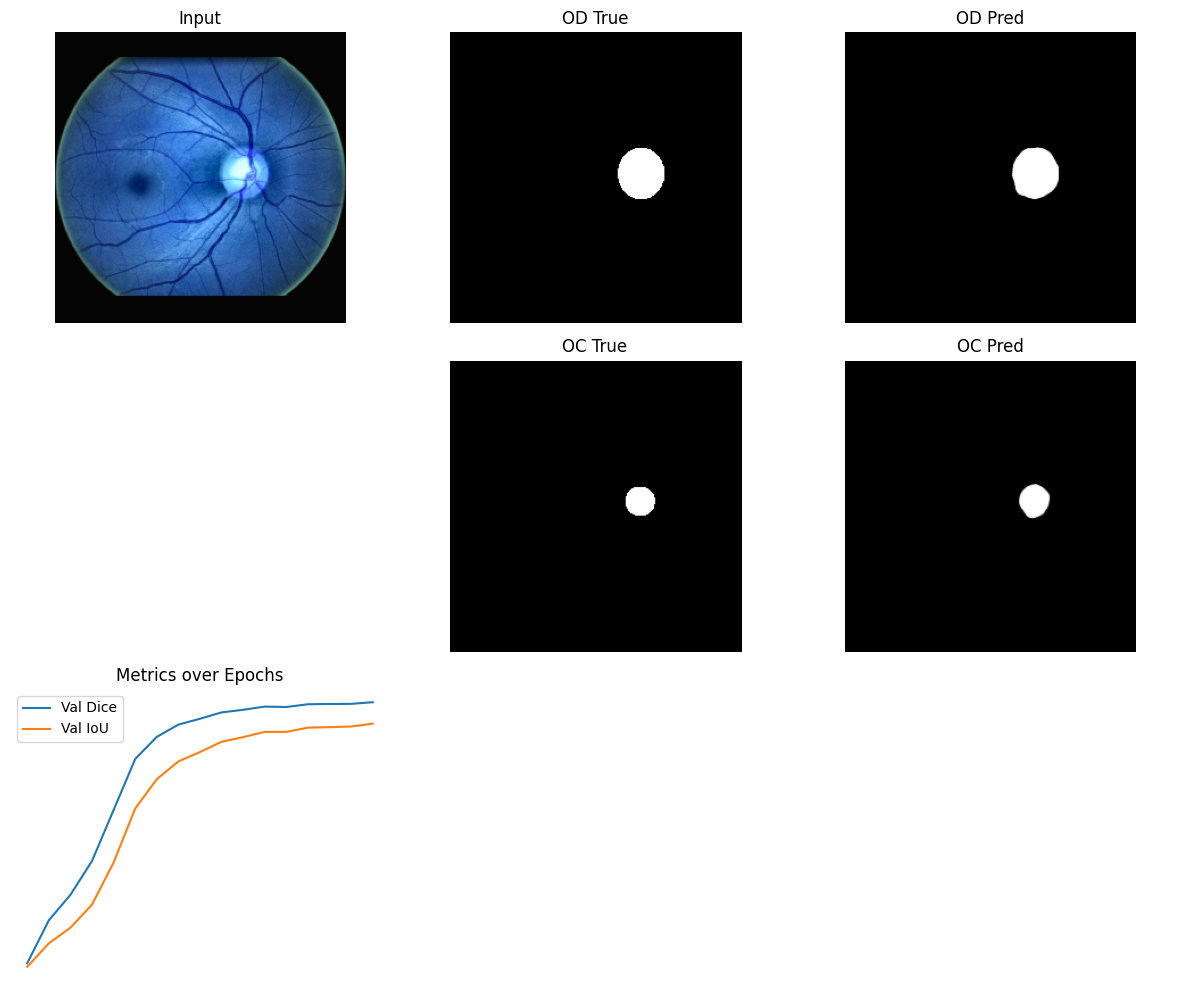

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


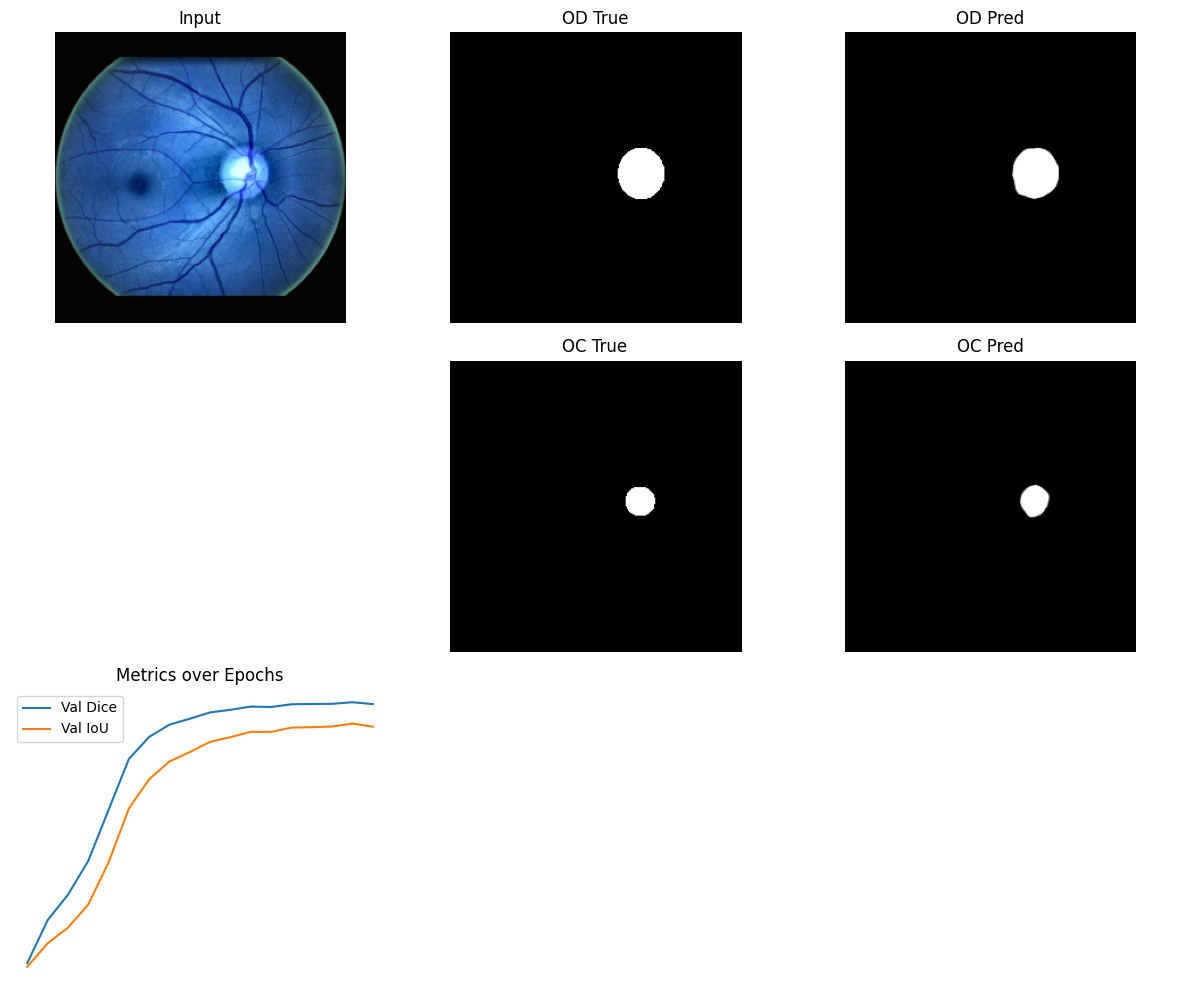

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


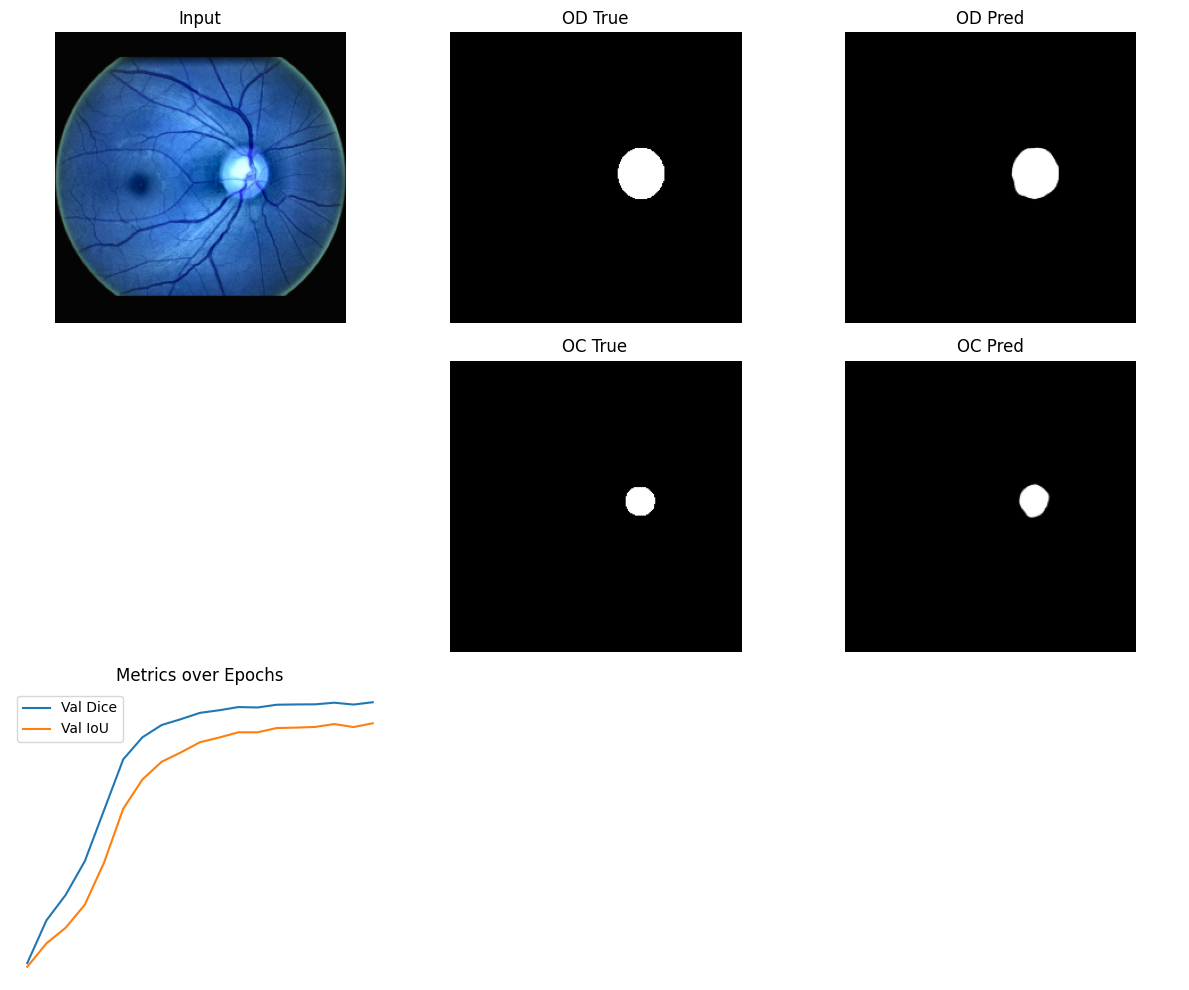

✅ Model saved to /content/drive/MyDrive/Model/model_epoch_20.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


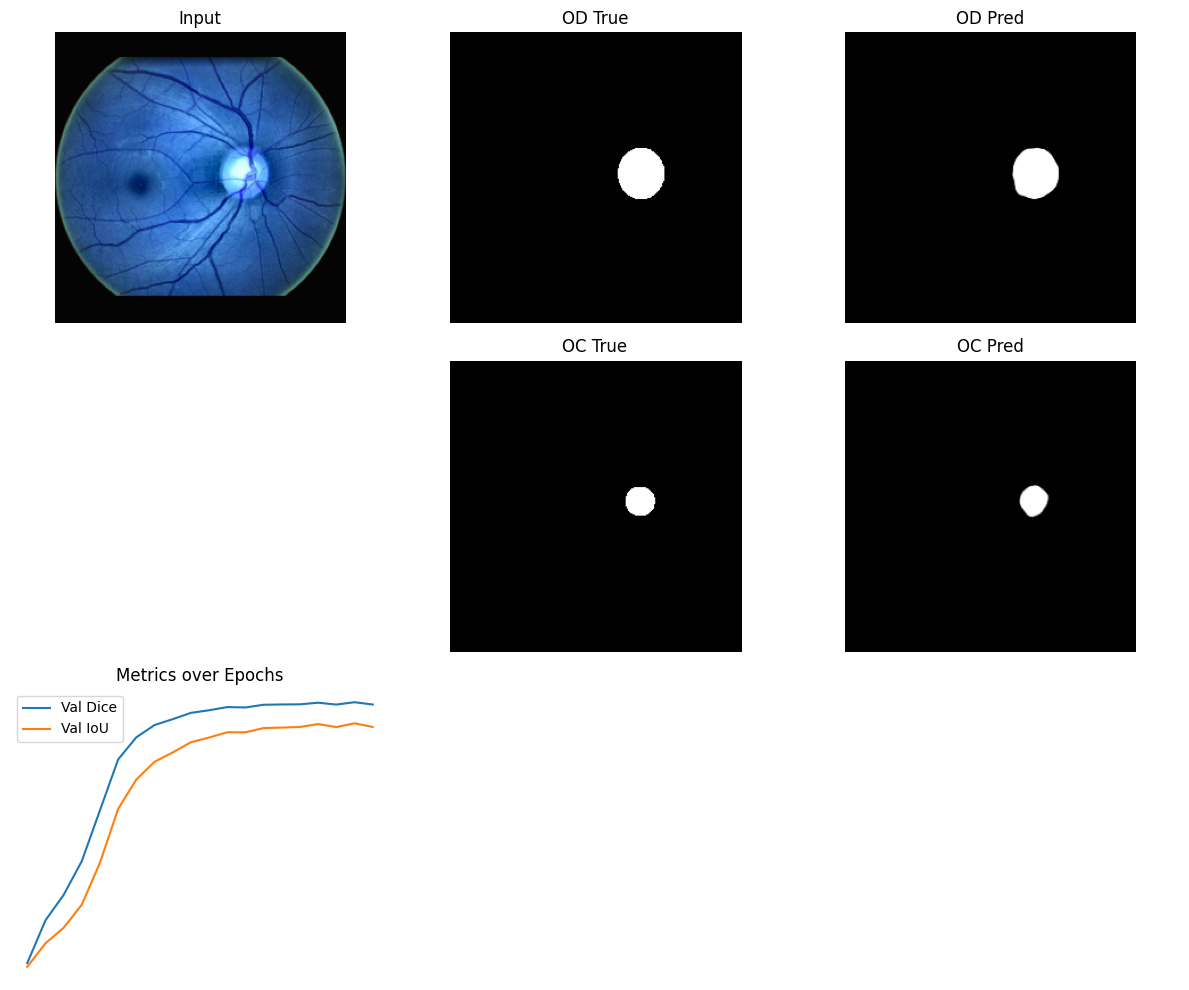

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


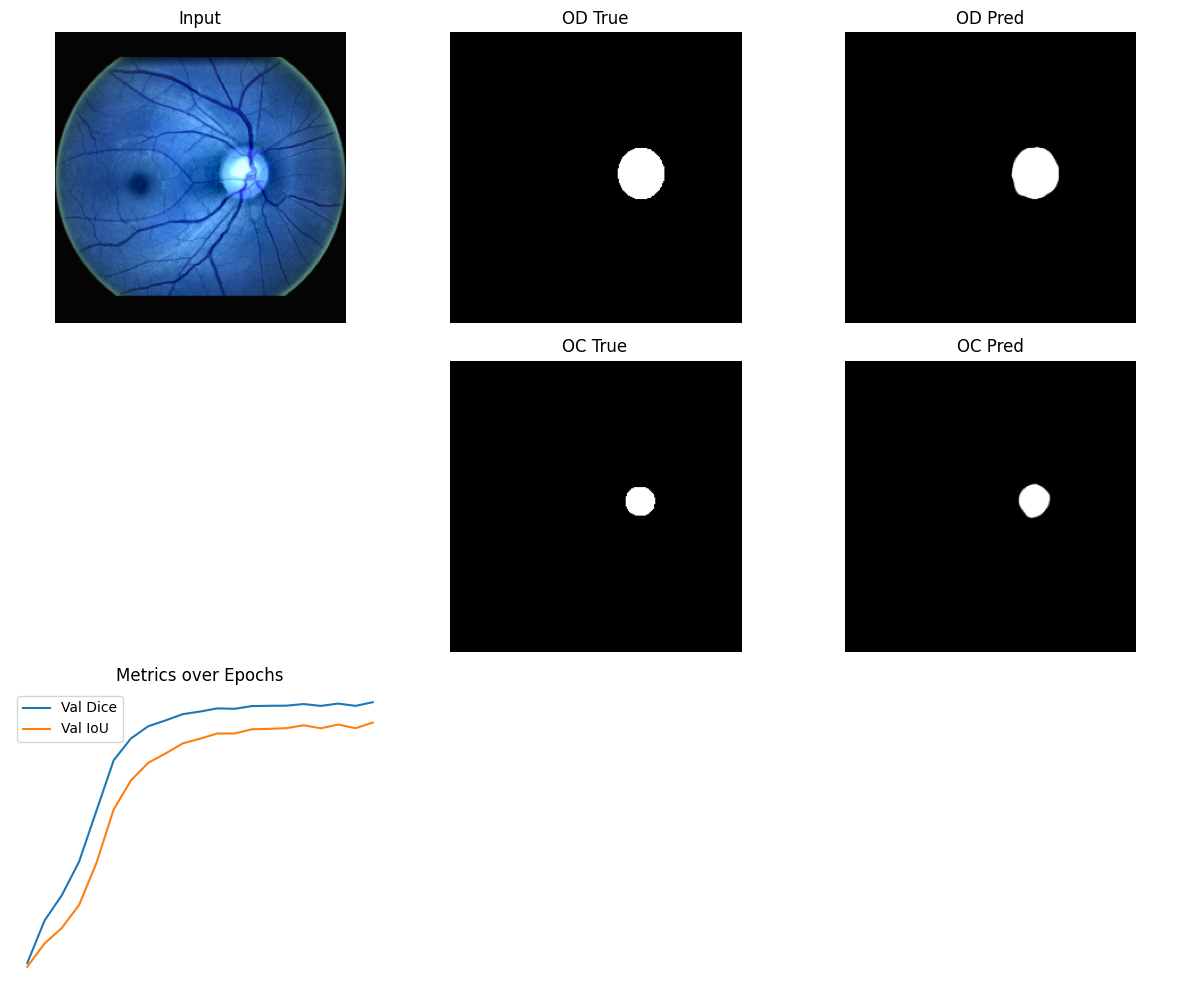

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


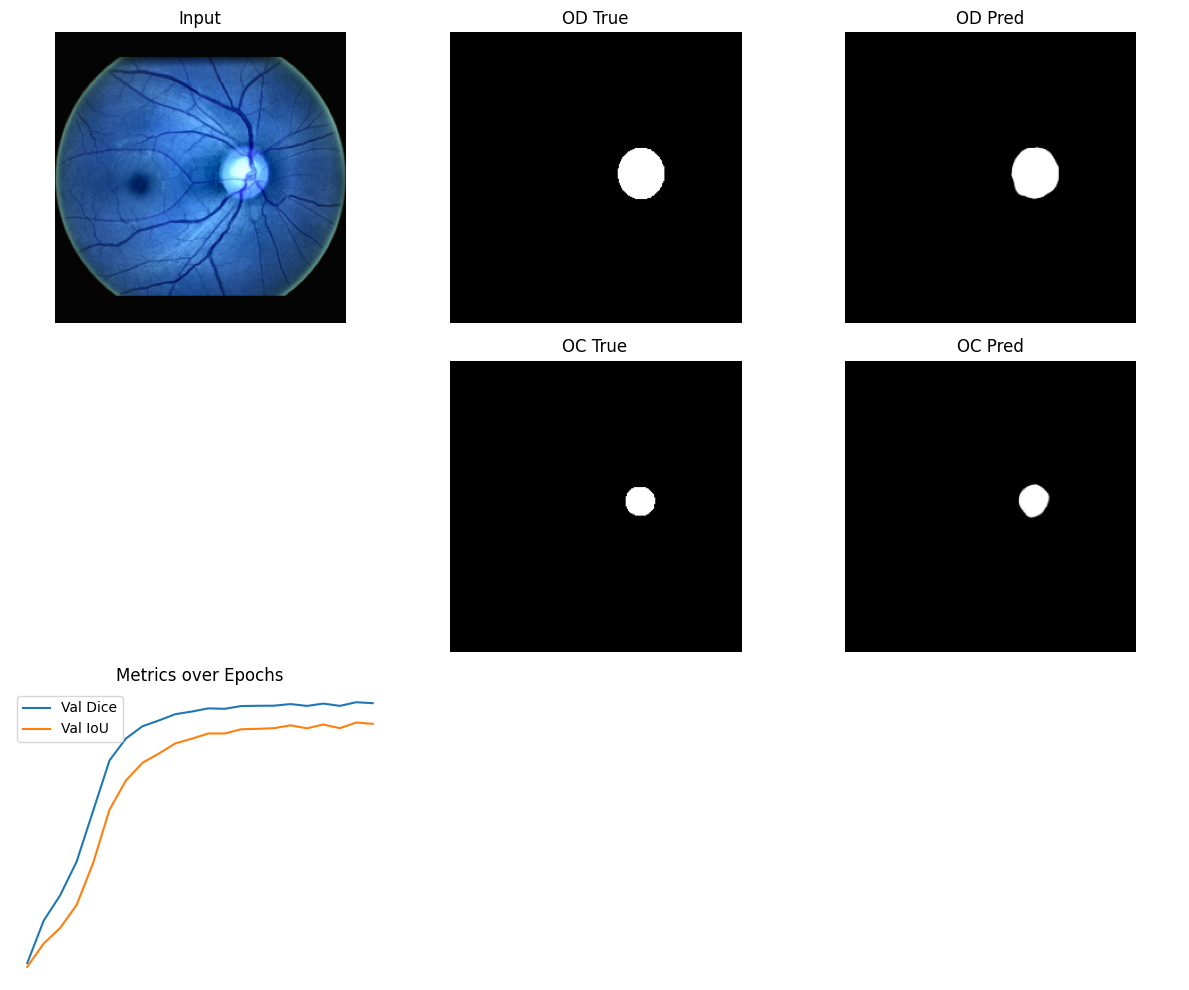

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


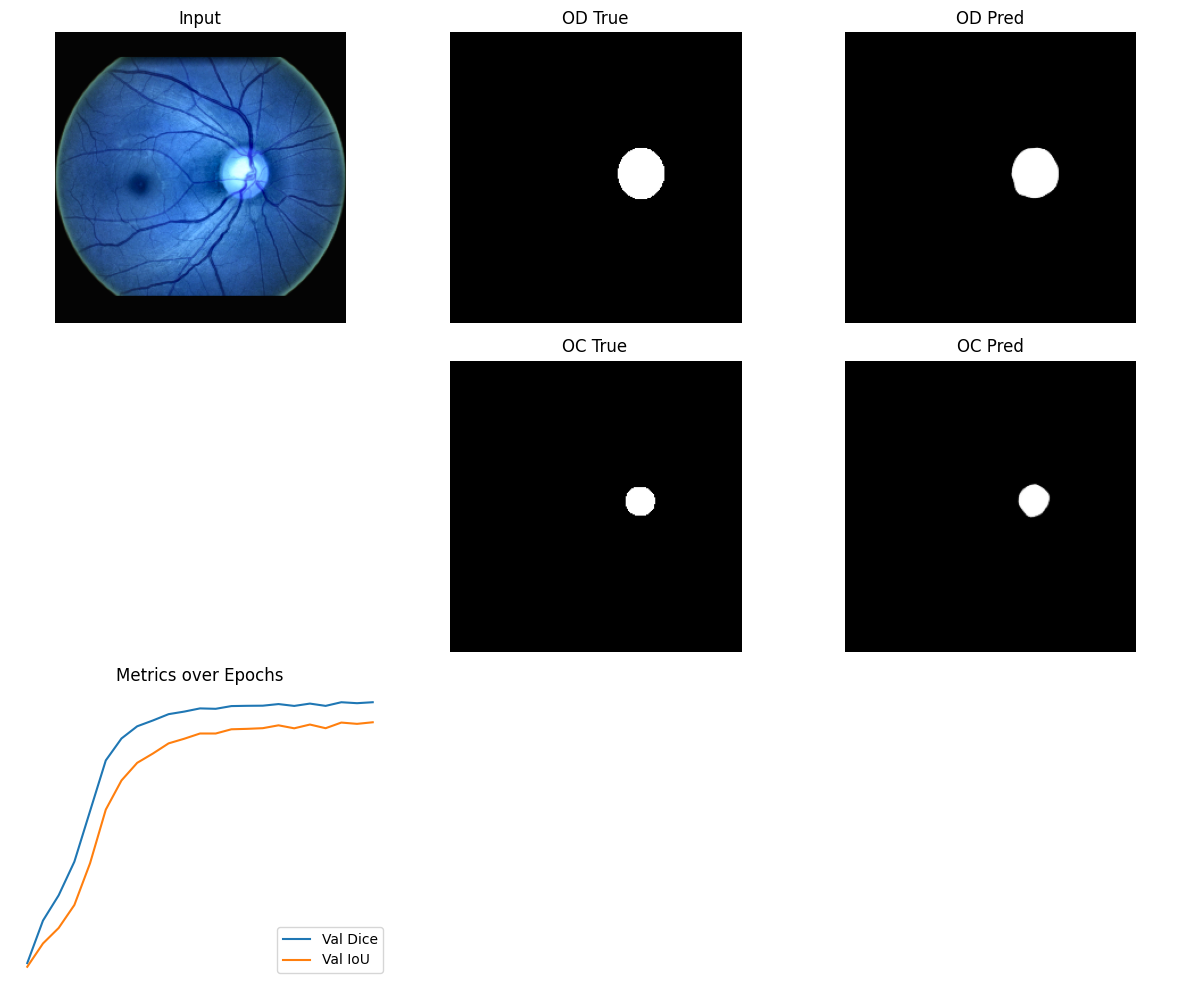

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


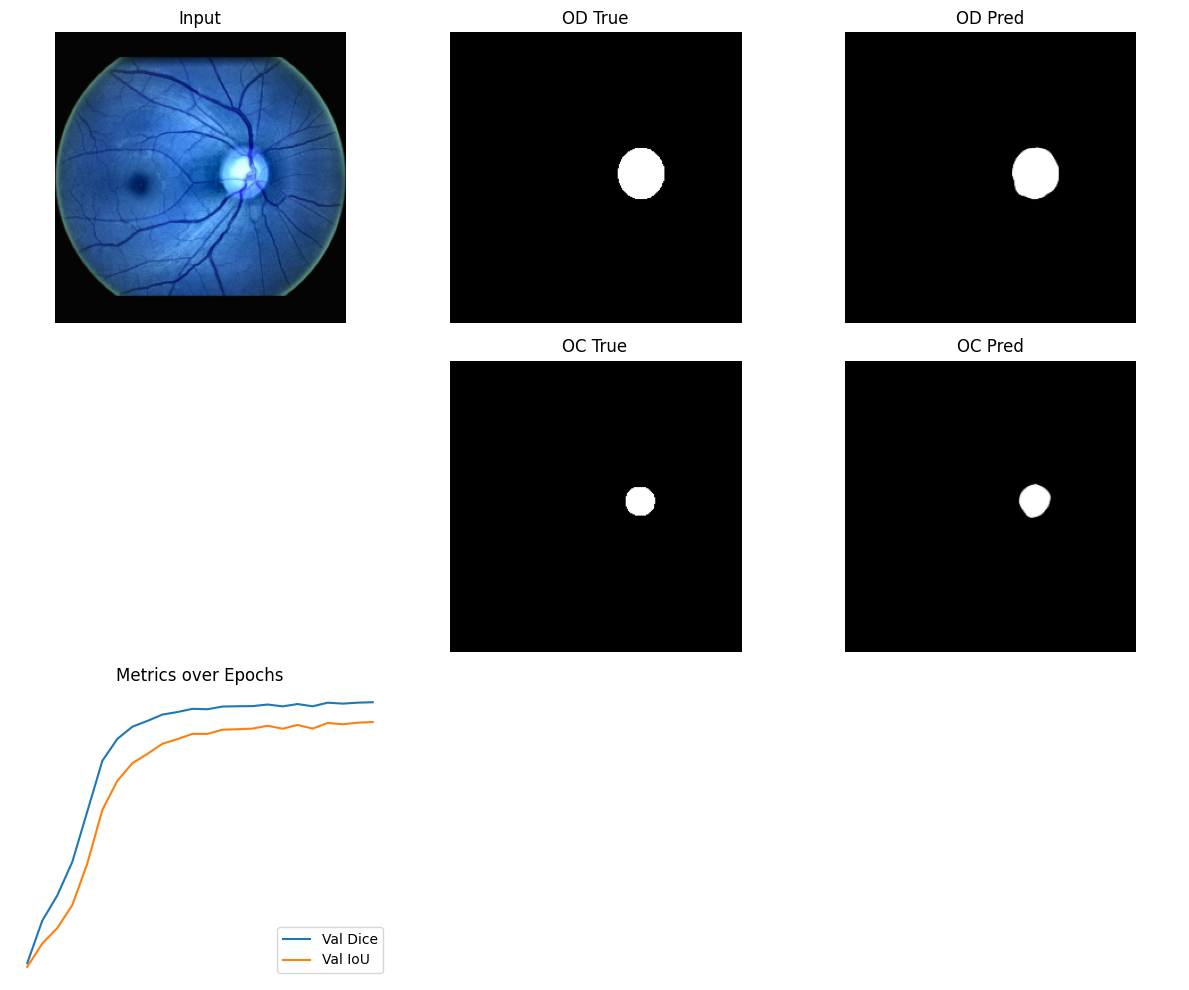

✅ Model saved to /content/drive/MyDrive/Model/model_epoch_25.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


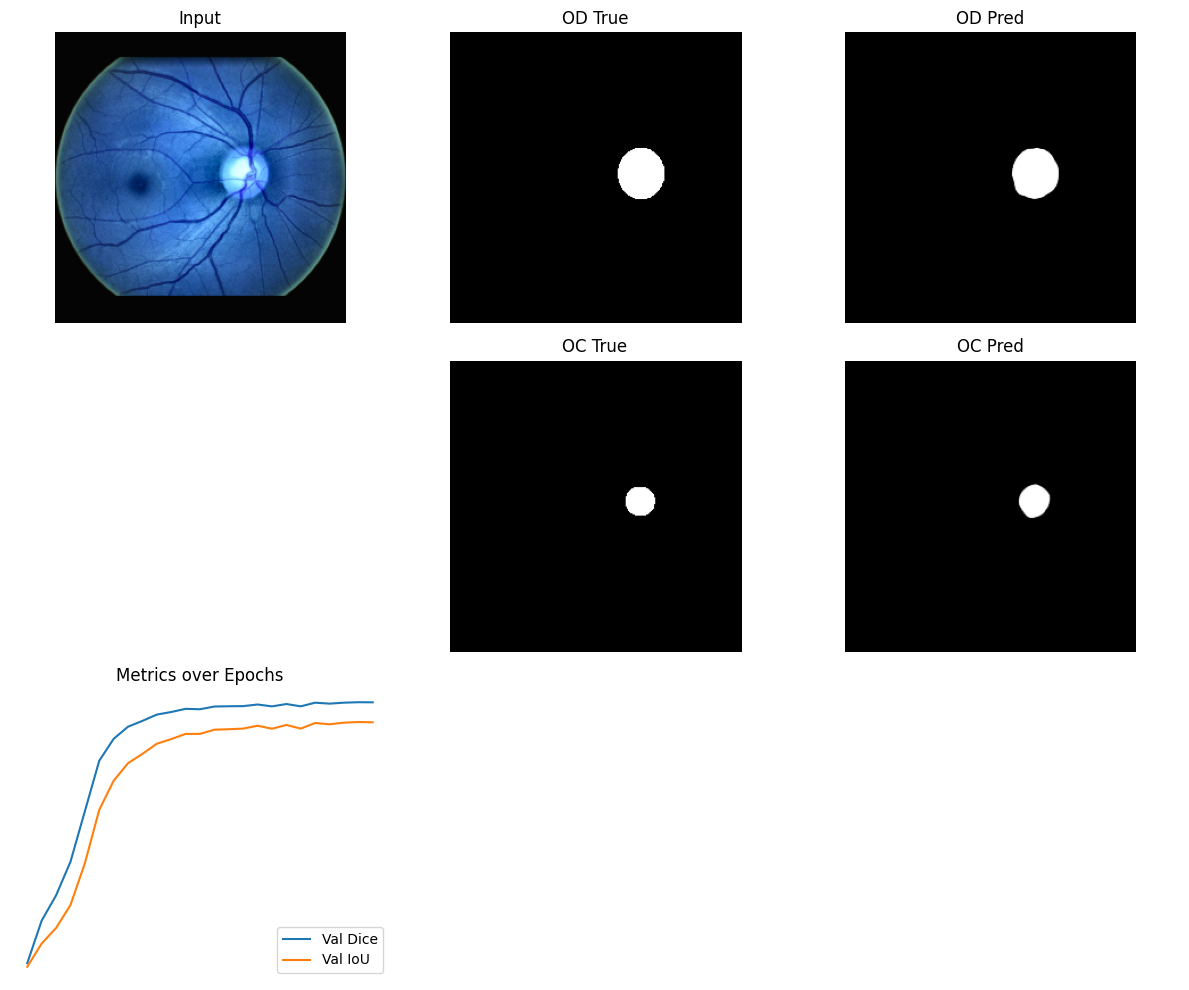

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


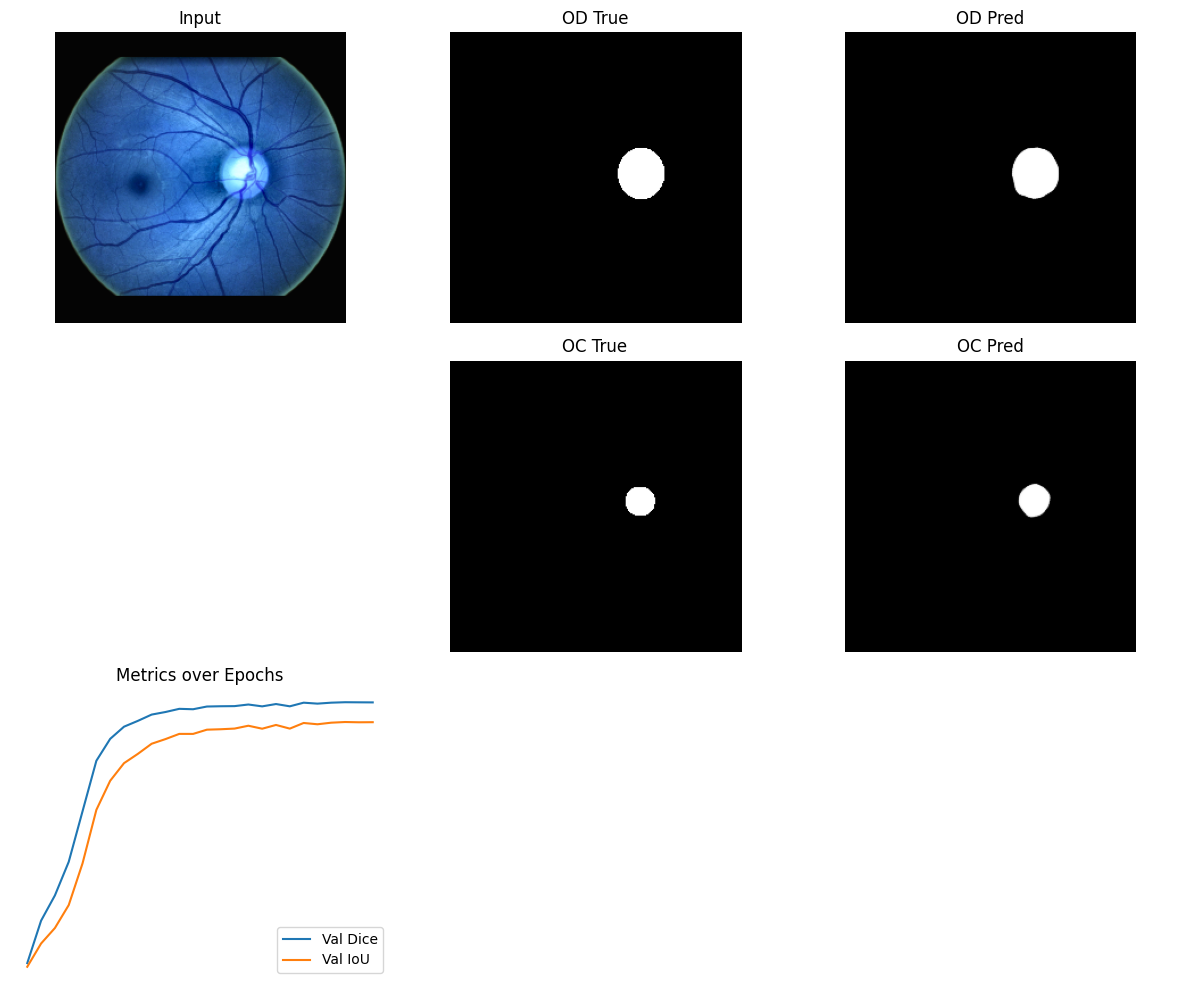

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


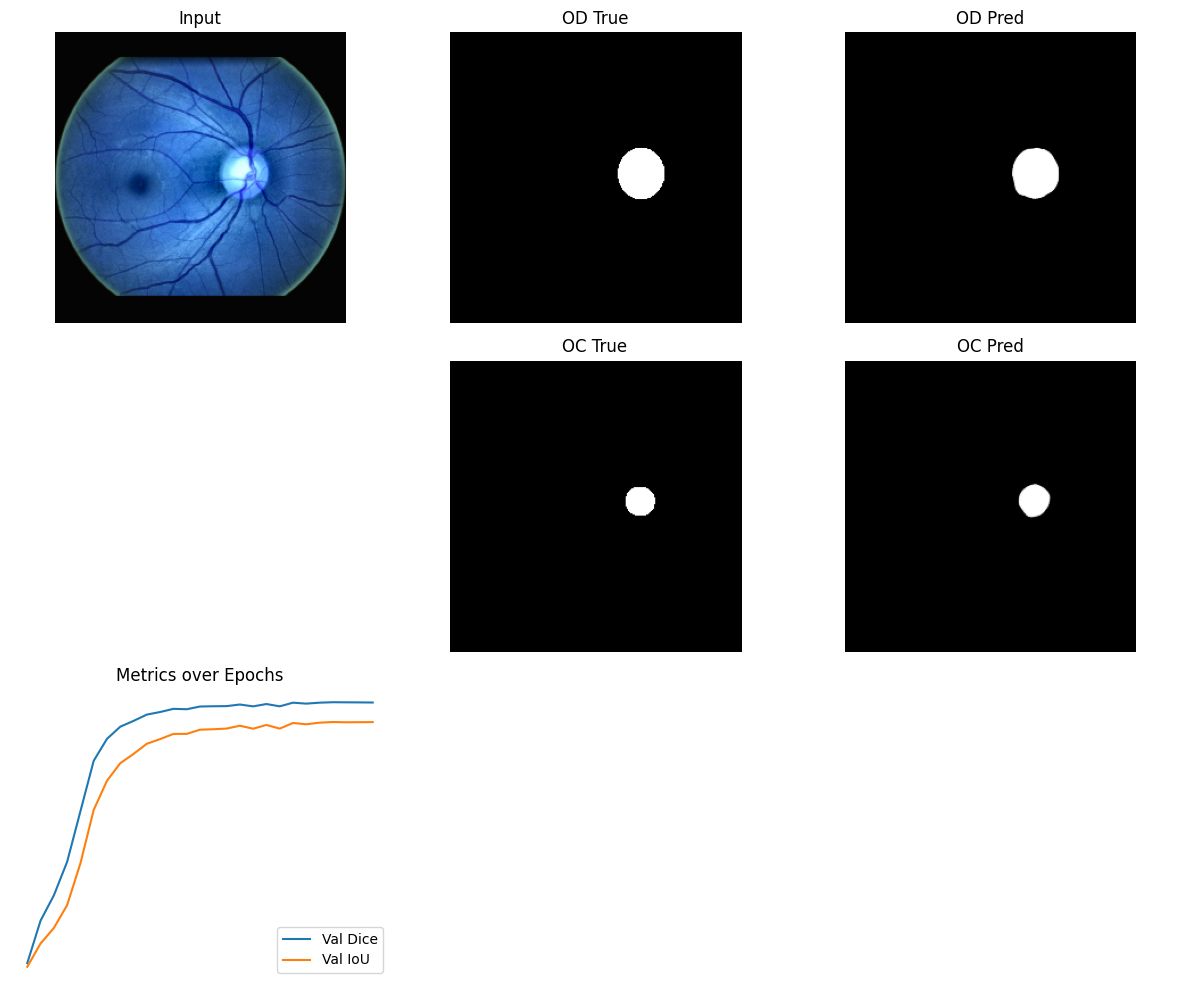

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


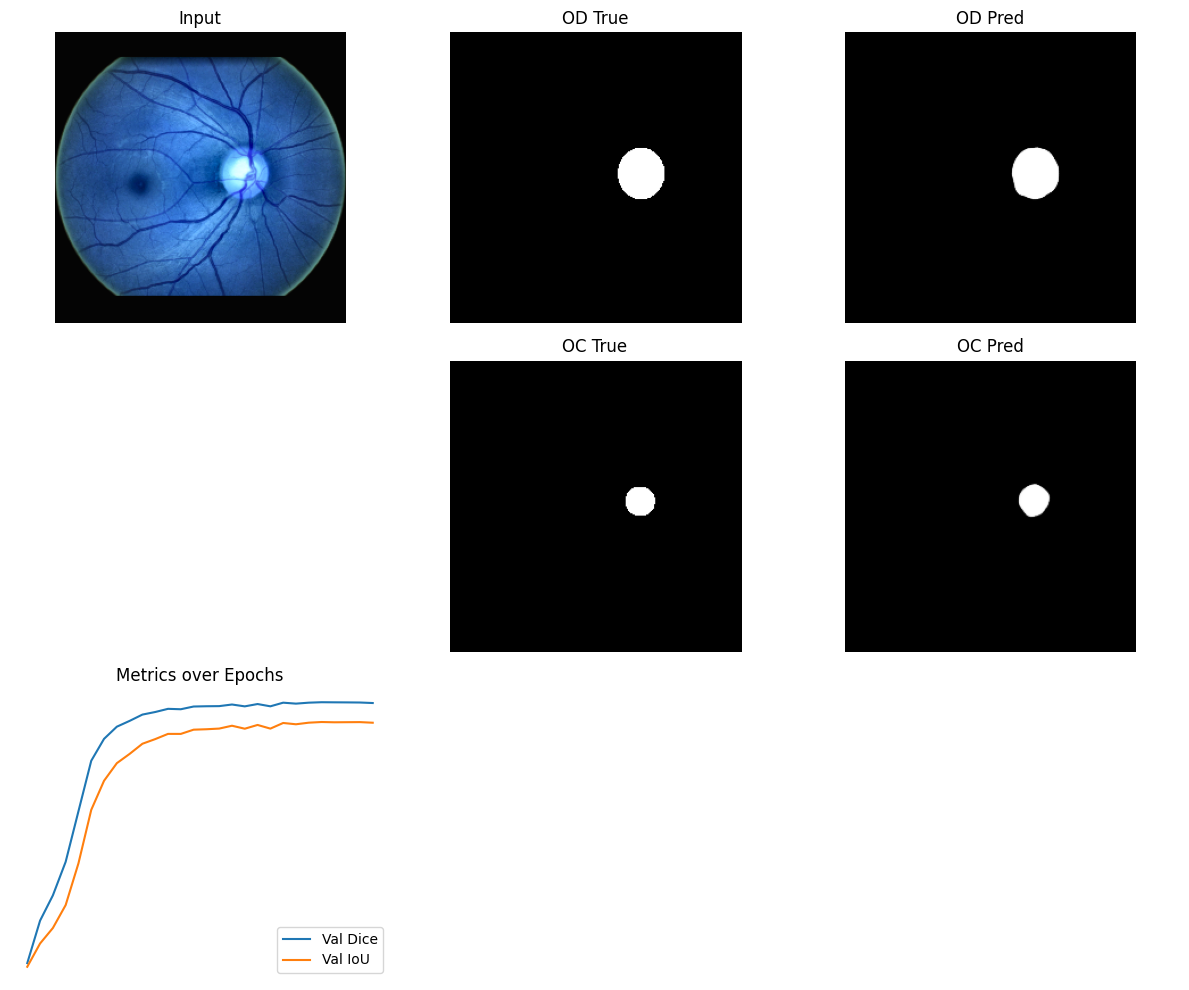

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


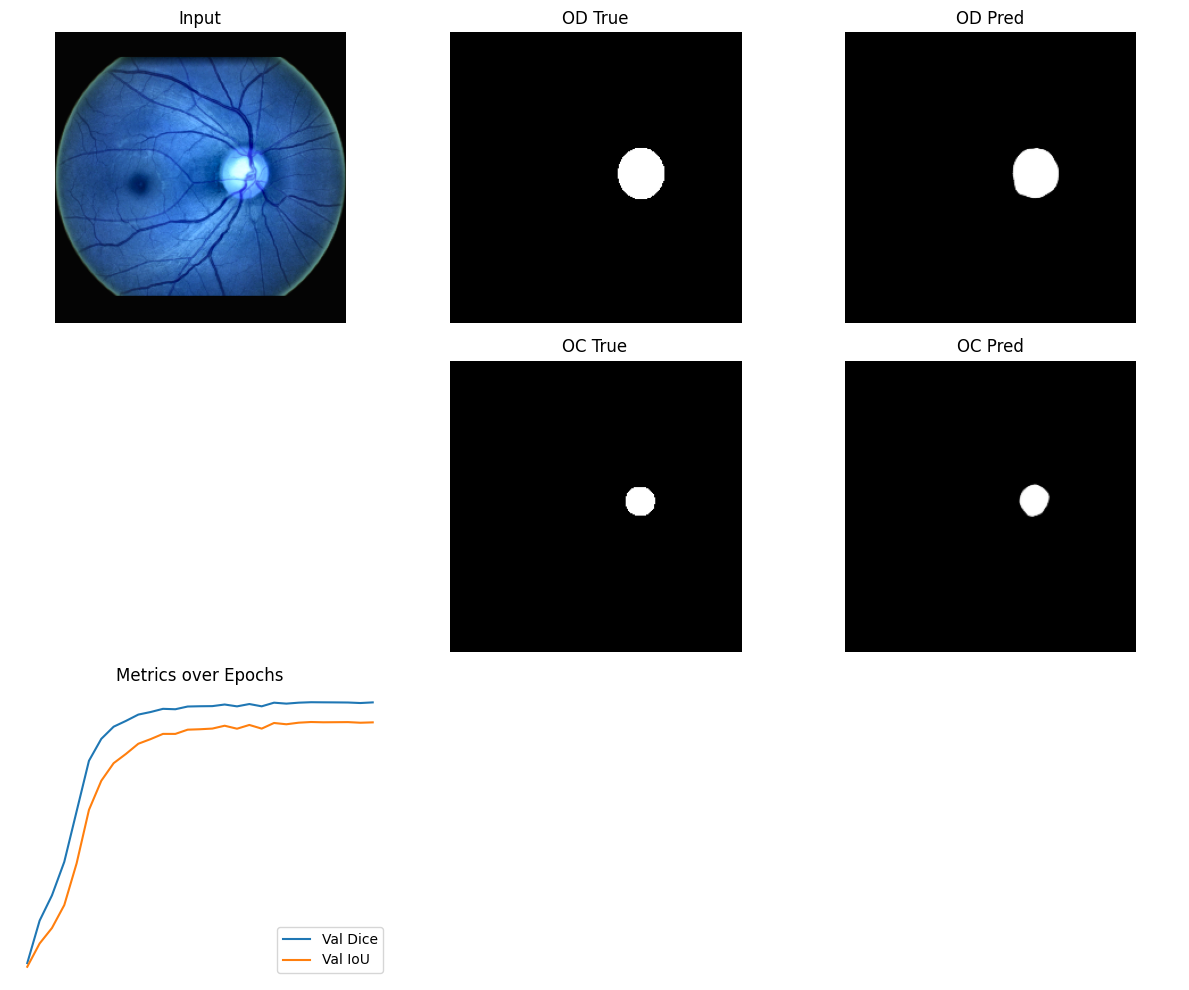

✅ Model saved to /content/drive/MyDrive/Model/model_epoch_30.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


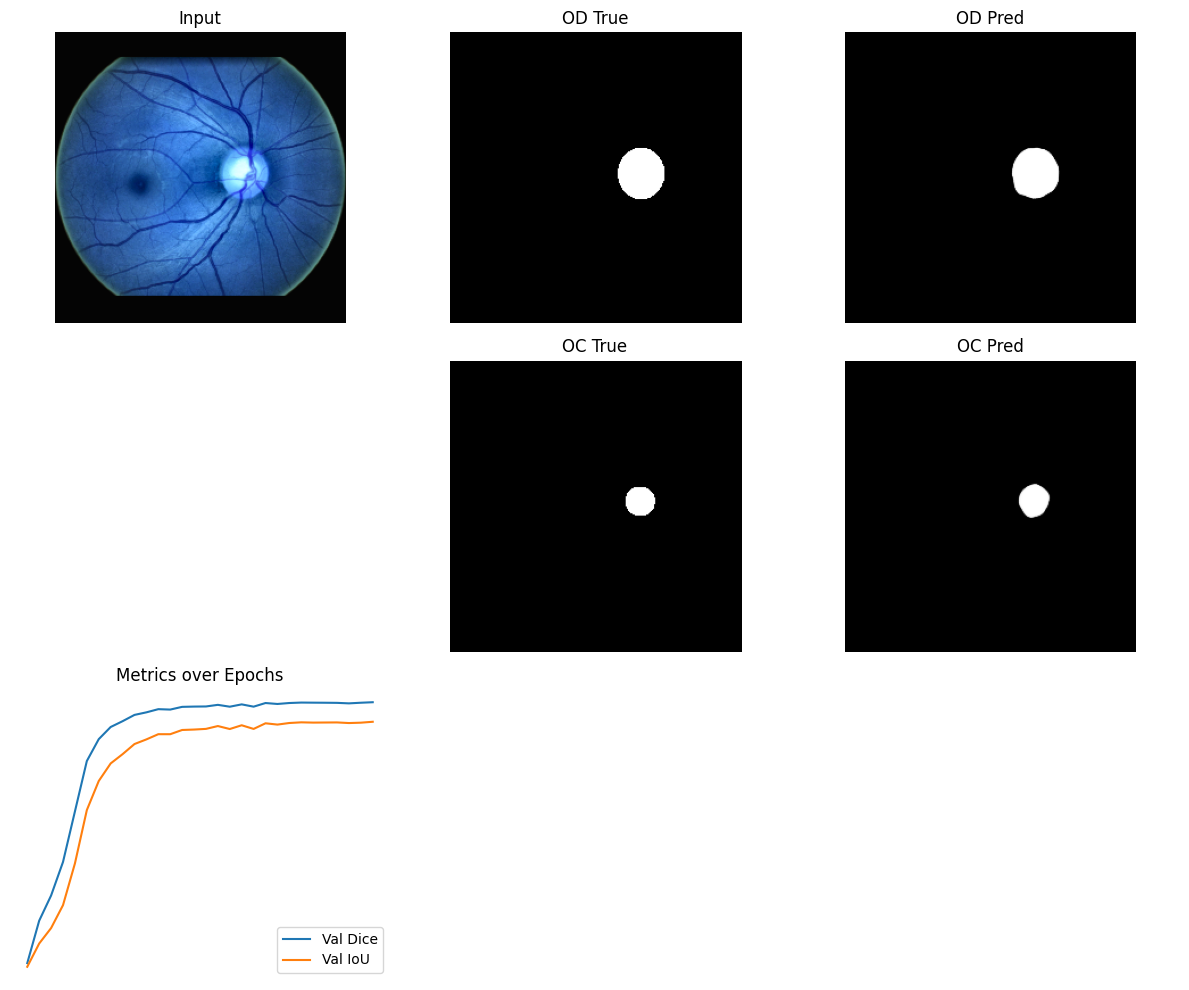

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from glob import glob
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import (
    Input, SeparableConv2D, BatchNormalization, ReLU, Conv2DTranspose,
    Concatenate, SpatialDropout2D, Conv2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

# --- CONFIGURATION ---
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 8
EPOCHS = 30
SAVE_INTERVAL = 5
INPUT_SHAPE = (*IMAGE_SIZE, 3)
FREEZE_ENCODER = True
DROPOUT_RATE = 0.1
SAVE_DIR = "/content/drive/MyDrive/Model"
os.makedirs(SAVE_DIR, exist_ok=True)

file_records = df3[["image_path", "od_path", "oc_path"]].values.tolist()
random.shuffle(file_records)
split = int(0.9 * len(file_records))
train_records = file_records[:split]
val_records = file_records[split:]

# --- PREPROCESSING ---
def apply_clahe_color(image):
    try:
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        merged = cv2.merge((cl, a, b))
        return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)
    except:
        return image

def load_image_and_masks(img_path, od_path, oc_path):
    image = cv2.imread(img_path)
    image = apply_clahe_color(cv2.resize(image, IMAGE_SIZE)) / 255.0

    def load_mask(path):
        mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        return (cv2.resize(mask, IMAGE_SIZE) > 0).astype(np.uint8) if mask is not None else np.zeros(IMAGE_SIZE)

    od = load_mask(od_path)
    oc = load_mask(oc_path)
    return image.astype(np.float32), np.stack([od, oc], axis=-1).astype(np.float32)

# --- DATA GENERATOR ---
class FundusDataset(Sequence):
    def __init__(self, records, augment=False):
        self.records = records
        self.augment = augment
        self.gen = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,
            zoom_range=0.1, horizontal_flip=True, fill_mode='nearest'
        )

    def __len__(self): return int(np.ceil(len(self.records) / BATCH_SIZE))

    def __getitem__(self, idx):
        batch = self.records[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]
        x, y = [], []
        for img_path, od_path, oc_path in batch:
            img, mask = load_image_and_masks(img_path, od_path, oc_path)
            if self.augment:
                seed = random.randint(0, int(1e6))
                img = self.gen.random_transform(img, seed=seed)
                mask = self.gen.random_transform(mask, seed=seed)
            x.append(img)
            y.append(mask)
        return np.array(x), np.array(y)

# --- CUSTOM LOSS ---
def dice_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def iou_coef(y_true, y_pred, smooth=1e-6):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1,2,3]) - intersection
    return tf.reduce_mean((intersection + smooth) / (union + smooth))

def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    dice_loss = 1 - dice_coef(y_true, y_pred)
    return bce + dice_loss

# --- MODEL ---
def build_multitask_unet_mobilenetv2(input_shape, dropout_rate=0.1, freeze_encoder=True):
    inputs = Input(shape=input_shape)
    base = MobileNetV2(weights='imagenet', include_top=False, input_tensor=inputs)

    if freeze_encoder:
        for layer in base.layers:
            layer.trainable = False

    s1 = base.get_layer('block_1_expand_relu').output
    s2 = base.get_layer('block_3_expand_relu').output
    s3 = base.get_layer('block_6_expand_relu').output
    s4 = base.get_layer('block_13_expand_relu').output
    b = base.get_layer('block_16_project').output

    def conv_block(x, f):
        for _ in range(2):
            x = SeparableConv2D(f, 3, padding='same',
                                depthwise_initializer='he_normal',
                                pointwise_initializer='he_normal')(x)
            x = BatchNormalization()(x)
            x = ReLU()(x)
        return x

    def up_block(x, skip, f):
        x = Conv2DTranspose(f, 2, strides=2, padding='same')(x)
        x = Concatenate()([x, skip])
        x = SpatialDropout2D(dropout_rate)(x)
        return conv_block(x, f)

    d = up_block(b, s4, 256)
    d = up_block(d, s3, 128)
    d = up_block(d, s2, 64)
    d = up_block(d, s1, 32)
    d = Conv2DTranspose(32, 2, strides=2, padding='same')(d)
    d = SpatialDropout2D(dropout_rate)(d)
    d = conv_block(d, 32)

    out = Conv2D(2, 1, activation='sigmoid', name='od_oc_output')(d)
    return Model(inputs, out)

# --- CALLBACKS ---
class LivePlotCallback(Callback):
    def __init__(self, val_gen):
        self.val_gen = val_gen
        self.dice_scores = []
        self.iou_scores = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.dice_scores.append(logs.get('val_dice_coef', 0))
        self.iou_scores.append(logs.get('val_iou_coef', 0))

        img, y_true = self.val_gen[0]
        y_pred = self.model.predict(img)[0]

        fig, axes = plt.subplots(3, 3, figsize=(12, 10))
        axes[0, 0].imshow(img[0])
        axes[0, 0].set_title("Input")
        axes[0, 1].imshow(y_true[0][:,:,0], cmap='gray')
        axes[0, 1].set_title("OD True")
        axes[0, 2].imshow(y_pred[:,:,0], cmap='gray')
        axes[0, 2].set_title("OD Pred")

        axes[1, 1].imshow(y_true[0][:,:,1], cmap='gray')
        axes[1, 2].imshow(y_pred[:,:,1], cmap='gray')
        axes[1, 1].set_title("OC True")
        axes[1, 2].set_title("OC Pred")

        axes[2, 0].plot(self.dice_scores, label="Val Dice")
        axes[2, 0].plot(self.iou_scores, label="Val IoU")
        axes[2, 0].legend()
        axes[2, 0].set_title("Metrics over Epochs")

        for ax in axes.flatten(): ax.axis('off')
        plt.tight_layout()
        plt.show()

class CustomCheckpoint(Callback):
    def __init__(self, save_dir, save_interval=5):
        super().__init__()
        self.save_dir = save_dir
        self.save_interval = save_interval
        self.prev_model_path = None

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_interval == 0:
            path = os.path.join(self.save_dir, f"model_epoch_{epoch+1}.keras")
            if self.prev_model_path and os.path.exists(self.prev_model_path):
                os.remove(self.prev_model_path)
            self.model.save(path)
            print(f"\u2705 Model saved to {path}")
            self.prev_model_path = path

# --- RESUME FROM LAST CHECKPOINT ---
def get_latest_checkpoint(save_dir):
    model_files = sorted(glob(os.path.join(save_dir, "model_epoch_*.keras")))
    if model_files:
        last_model = model_files[-1]
        last_epoch = int(os.path.basename(last_model).split("_")[-1].split(".")[0])
        print(f"\ud83d\udd04 Resuming from {last_model} (Epoch {last_epoch})")
        return last_model, last_epoch
    return None, 0

# --- TRAINING ---
train_gen = FundusDataset(train_records, augment=True)
val_gen = FundusDataset(val_records, augment=False)

last_model_path, initial_epoch = get_latest_checkpoint(SAVE_DIR)
if last_model_path:
    model = tf.keras.models.load_model(
        last_model_path,
        custom_objects={"dice_coef": dice_coef, "iou_coef": iou_coef, "combined_loss": combined_loss}
    )
else:
    model = build_multitask_unet_mobilenetv2(INPUT_SHAPE, dropout_rate=DROPOUT_RATE, freeze_encoder=FREEZE_ENCODER)

model.compile(optimizer=Adam(learning_rate=1e-4), loss=combined_loss, metrics=[dice_coef, iou_coef])
model.summary()

model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    initial_epoch=initial_epoch,
    callbacks=[
        CustomCheckpoint(SAVE_DIR, save_interval=SAVE_INTERVAL),
        LivePlotCallback(val_gen),
        TqdmCallback(verbose=1)
    ],
    verbose=0
)

In [ ]:
# --- SAVE FINAL MODEL ---
final_model_path = os.path.join(SAVE_DIR, "final_model.keras")
model.save(final_model_path)
print(f"\n✅ Final model saved at: {final_model_path}")



✅ Final model saved at: /content/drive/MyDrive/Model/final_model.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


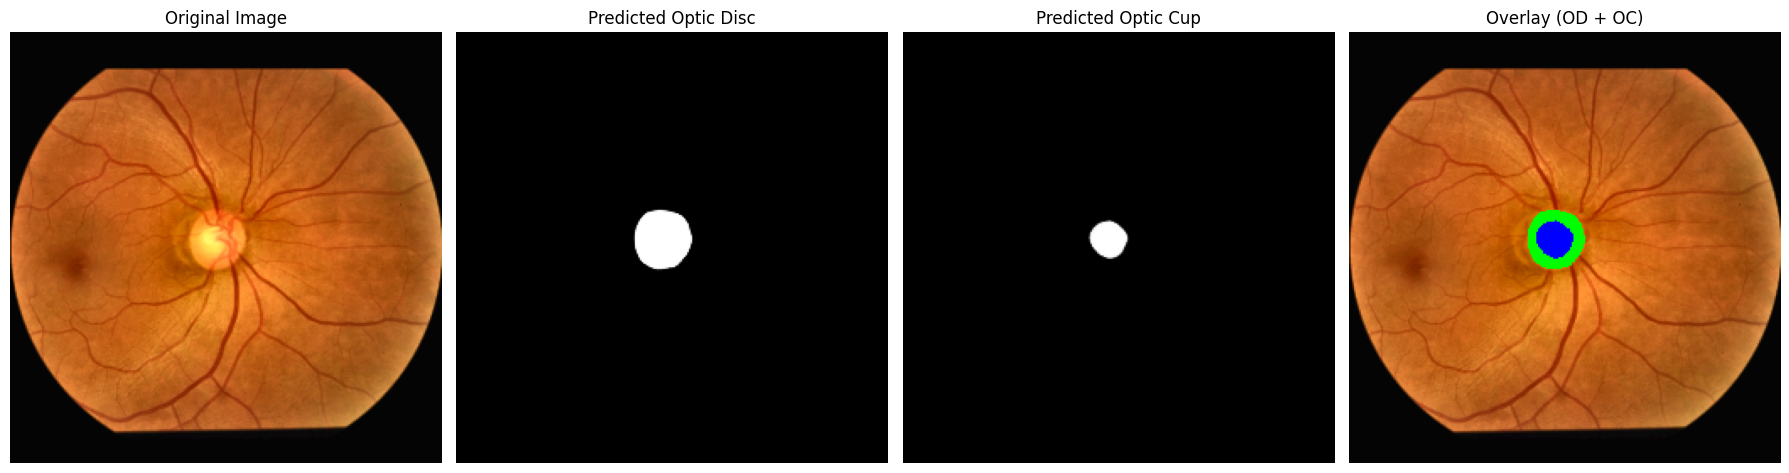

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# --- CONFIG ---
IMAGE_SIZE = (256, 256)
MODEL_PATH = "/content/drive/MyDrive/Model/final_model.keras"  # or any checkpoint .keras
CLAHE_ENABLED = True

# --- Load Model ---
model = load_model(MODEL_PATH, custom_objects={
    "dice_coef": dice_coef,
    "iou_coef": iou_coef,
    "combined_loss": combined_loss
})

# --- CLAHE Preprocessing ---
def apply_clahe_color(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

# --- Predict Function ---
def predict_and_visualize(image_path):
    # Load and preprocess
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)
    if CLAHE_ENABLED:
        img = apply_clahe_color(img)
    img_input = img.astype(np.float32) / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    # Predict
    pred = model.predict(img_input)[0]  # (256, 256, 2)
    od_pred = pred[:, :, 0]
    oc_pred = pred[:, :, 1]

    # Plot
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[1].imshow(od_pred, cmap='gray')
    axes[1].set_title("Predicted Optic Disc")
    axes[2].imshow(oc_pred, cmap='gray')
    axes[2].set_title("Predicted Optic Cup")

    # Overlay
    overlay = img.copy()
    overlay[od_pred > 0.5] = [0, 255, 0]   # Green for OD
    overlay[oc_pred > 0.5] = [255, 0, 0]   # Blue for OC
    axes[3].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[3].set_title("Overlay (OD + OC)")

    for ax in axes:
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# --- USAGE ---
# Replace with your image path
predict_and_visualize("/content/Fundus_task/full-fundus/full-fundus/BEH-119.png")
